In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Specify the path to the Common Voice dataset
dataset_path = 'F:/cv-corpus-7.0-2021-07-21/en'

In [3]:
# Read the CSV file containing the metadata of the Common Voice dataset
metadata_path = f'{dataset_path}/train.tsv'
metadata_df = pd.read_csv(metadata_path, sep='\t')

In [4]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

In [5]:
metadata_df.groupby("age")["age"].unique()

age
eighties      [eighties]
fifties        [fifties]
fourties      [fourties]
nineties      [nineties]
seventies    [seventies]
sixties        [sixties]
teens            [teens]
thirties      [thirties]
twenties      [twenties]
Name: age, dtype: object

In [6]:
metadata_df.groupby("gender")["gender"].unique()

gender
female    [female]
male        [male]
other      [other]
Name: gender, dtype: object

In [7]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


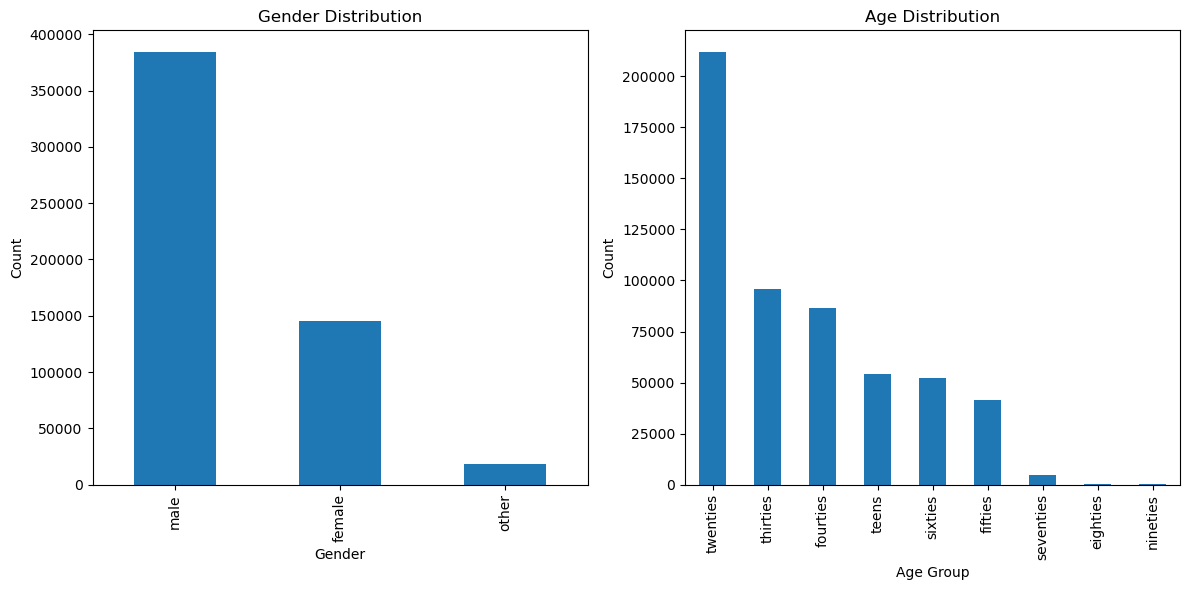

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the metadata_df already
plt.figure(figsize=(12, 6))

# Plot the gender distribution
plt.subplot(1, 2, 1)
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot the age distribution
plt.subplot(1, 2, 2)
metadata_df['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [9]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment  
0       NaN     NaN    NaN     en      NaN  
1  twenties  female     us     en      NaN  
2  twenties  female     us     en      NaN  
3  twenties  female     us     en      NaN  
4  twenties  female     us     en      NaN

In [11]:
import pandas as pd
import numpy as np

# Define the variables
F10 = 'F10'
M10 = 'M10'
F20 = 'F20'
M20 = 'M20'
F30 = 'F30'
M30 = 'M30'
F40 = 'F40'
M40 = 'M40'
F50 = 'F50'
M50 = 'M50'
F60 = 'F60'
M60 = 'M60'
# Assign the 'class' values
metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'female'), "class"] = F10
#metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'male'), "class"] = M10

metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'female'), "class"] = F20
#metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'male'), "class"] = M20

metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'female'), "class"] = F30
#metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'male'), "class"] = M30

metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'female'), "class"] = F40
#metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'male'), "class"] = M40

metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'female'), "class"] = F50
#metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'male'), "class"] = M50

metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'female'), "class"] = F60
#metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'male'), "class"] = M60


In [12]:
metadata_df.dropna(subset=["class"], inplace=True)

metadata_df["class"] = metadata_df["class"].astype(int)

In [13]:
#Data Preprocessing
#Let's see the number of samples of each gender:
# get total samples
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 759975
Total male samples: 384284
Total female samples: 145409


In [14]:
metadata_df.head()

client_id  \
0  5abb126fd1e28573785f326f586caca772323d32a57b42...   
1  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
2  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
3  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   
4  5ac2fae9551f6b09eb80d1ffb68d633660ab3f6963279c...   

                           path  \
0     common_voice_en_86742.mp3   
1  common_voice_en_22932163.mp3   
2  common_voice_en_22932165.mp3   
3  common_voice_en_22932166.mp3   
4  common_voice_en_22932167.mp3   

                                            sentence  up_votes  down_votes  \
0                      Don't hurt my sore arm again.         2           0   
1  It also resembles a Japanese curry and usually...         2           0   
2  She was referred to affectionately as "The Rho...         2           1   
3  A period referred to as the 'Ai Noa or "free e...         2           0   
4  The river flows generally north, and its headw...         2           1   

        age  gender accent locale  segment class  
0       NaN     NaN    NaN     en      NaN   nan  
1  twenties  female     us     en      NaN   F20  
2  twenties  female     us     en      NaN   F20  
3  twenties  female     us     en      NaN   F20  
4  twenties  female     us     en      NaN   F20

#Assuming 'metadata_df' is your DataFrame containing the data
metadata_df = metadata_df.reset_index(drop=True)

#Assign class labels based on age
metadata_df.loc[(metadata_df["age"] == 'teens'), "class"] = 10
metadata_df.loc[(metadata_df["age"] == 'twenties'), "class"] = 20
metadata_df.loc[(metadata_df["age"] == 'thirties'), "class"] = 30
metadata_df.loc[(metadata_df["age"] == 'fourties'), "class"] = 40
metadata_df.loc[(metadata_df["age"] == 'fifties'), "class"] = 50
metadata_df.loc[(metadata_df["age"] == 'sixties'), "class"] = 60

#Separate data by gender
male_df = metadata_df[metadata_df['gender'] == 'male']
female_df = metadata_df[metadata_df['gender'] == 'female']

#Randomly select 40,000 samples for each gender
male_df = male_df.sample(n=378614, random_state=42)
female_df = female_df.sample(n=142548, random_state=42)

#Select 25,000 male and 15,000 female samples for the training subset
train_male_df = male_df.sample(n=25000, random_state=42)
train_female_df = female_df.sample(n=15000, random_state=42)

#Combine the training subset
metadata_df = pd.concat([train_male_df, train_female_df])

import pandas as pd
import numpy as np

# Define the variables
F10 = 'F10'
M10 = 'M10'
F20 = 'F20'
M20 = 'M20'
F30 = 'F30'
M30 = 'M30'
F40 = 'F40'
M40 = 'M40'
F50 = 'F50'
M50 = 'M50'
F60 = 'F60'
M60 = 'M60'

# Create an empty DataFrame
metadata_df = pd.DataFrame(columns=['age', 'gender', 'path', 'sentence', 'up_votes', 'down_votes', 'accent', 'locale', 'segment', 'class'])

# Assign the 'class' values
metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'female'), "class"] = F10
metadata_df.loc[(metadata_df["age"] == 'teens') & (metadata_df["gender"] == 'male'), "class"] = M10

metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'female'), "class"] = F20
metadata_df.loc[(metadata_df["age"] == 'twenties') & (metadata_df["gender"] == 'male'), "class"] = M20

metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'female'), "class"] = F30
metadata_df.loc[(metadata_df["age"] == 'thirties') & (metadata_df["gender"] == 'male'), "class"] = M30

metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'female'), "class"] = F40
metadata_df.loc[(metadata_df["age"] == 'fourties') & (metadata_df["gender"] == 'male'), "class"] = M40

metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'female'), "class"] = F50
metadata_df.loc[(metadata_df["age"] == 'fifties') & (metadata_df["gender"] == 'male'), "class"] = M50

metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'female'), "class"] = F60
metadata_df.loc[(metadata_df["age"] == 'sixties') & (metadata_df["gender"] == 'male'), "class"] = M60

# Generate female samples
female_ages = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties']
for age in female_ages:
    metadata_df = pd.concat([metadata_df, pd.DataFrame({'age': [age] * 500, 'gender': ['female'] * 500, 'class': ['F' + age[0].upper() + age[1:]] * 500})])

# Generate male samples
male_ages = ['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties']
for age in male_ages:
    metadata_df = pd.concat([metadata_df, pd.DataFrame({'age': [age] * 1500, 'gender': ['male'] * 1500, 'class': ['M' + age[0].upper() + age[1:]] * 1500})])

# Verify the DataFrame
print("Value counts of 'class' and 'gender':")
print(metadata_df.value_counts(['class', 'gender']))

# Group the data by the "class" and "gender" columns
grouped = metadata_df.groupby(["class", "gender"])

# Determine the desired sample size per class and gender
desired_samples_per_class_gender = 2000  # Ensure there are at least 2,000 samples per class and gender

# Randomly select samples from each class and gender, capped at the desired sample size per class and gender
train_df_list = []
for (class_label, gender), group in grouped:
    male_group = group[group['gender'] == 'male']
    female_group = group[group['gender'] == 'female']
    
    # Ensure at least 2,000 samples per class and gender
    male_samples = min(desired_samples_per_class_gender, len(male_group))
    female_samples = min(desired_samples_per_class_gender, len(female_group))
    
    train_df_list.append(male_group.sample(n=male_samples, replace=True, random_state=42))
    train_df_list.append(female_group.sample(n=female_samples, replace=True, random_state=42))

# Combine the training subset
train_df = pd.concat(train_df_list, ignore_index=True)

# Ensure the sample sizes are exactly 18,000 male and 6,000 female
male_df = train_df[train_df['gender'] == 'male']
female_df = train_df[train_df['gender'] == 'female']

train_male_df = male_df.sample(n=18000, replace=True, random_state=42)
train_female_df = female_df.sample(n=6000, replace=True, random_state=42)

# Combine the training subset
metadata_df = pd.concat([train_male_df, train_female_df])

In [15]:
# Get the counts for each gender-age group
female_counts = metadata_df.loc[metadata_df["gender"] == 'female'].groupby("class").size()
male_counts = metadata_df.loc[metadata_df["gender"] == 'male'].groupby("class").size()

# Adjust the sample sizes based on the available data
f10_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F10')].sample(n=min(1000, female_counts['F10']), random_state=42)
f20_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F20')].sample(n=min(1000, female_counts['F20']), random_state=42)
f30_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F30')].sample(n=min(1000, female_counts['F30']), random_state=42)
f40_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F40')].sample(n=min(1000, female_counts['F40']), random_state=42)
f50_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F50')].sample(n=min(1000, female_counts['F50']), random_state=42)
f60_samples = metadata_df.loc[(metadata_df["gender"] == 'female') & (metadata_df["class"] == 'F60')].sample(n=min(1000, female_counts['F60']), random_state=42)

#m10_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M10')].sample(n=min(3000, male_counts['M10']), random_state=42)
#m20_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M20')].sample(n=min(3000, male_counts['M20']), random_state=42)
#m30_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M30')].sample(n=min(3000, male_counts['M30']), random_state=42)
#m40_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M40')].sample(n=min(3000, male_counts['M40']), random_state=42)
#m50_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M50')].sample(n=min(3000, male_counts['M50']), random_state=42)
#m60_samples = metadata_df.loc[(metadata_df["gender"] == 'male') & (metadata_df["class"] == 'M60')].sample(n=min(3000, male_counts['M60']), random_state=42)

# Concatenate the samples back into the metadata_df
metadata_df = pd.concat([
    f10_samples,
    f20_samples,
    f30_samples,
    f40_samples,
    f50_samples,
    f60_samples
], ignore_index=True)

### metadata_df.head()

In [16]:
#After Decreasing the Speeach Data
n_samples = len(metadata_df)
# get total male samples
n_male_samples = len(metadata_df[metadata_df['gender'] == 'male'])
# get total female samples
n_female_samples = len(metadata_df[metadata_df['gender'] == 'female'])
print("Total samples:", n_samples)
print("Total male samples:", n_male_samples)
print("Total female samples:", n_female_samples)

Total samples: 6000
Total male samples: 0
Total female samples: 6000


In [17]:
metadata_df.head()

client_id  \
0  631bb378172971f14de8fe3b26c24e78625f9e625e6487...   
1  eb93d89cfedc3884904766b869a44a41e419bd8970cd12...   
2  150eb27cc03ac0bd0131aa11580e85b2e0bf299d45ff86...   
3  fcf6378ac85cf9cd37fbbbf10baeeb004444d39772e84a...   
4  af294a21d920e11013661f4735c1ebd5df298b0c73074b...   

                           path  \
0  common_voice_en_24941071.mp3   
1  common_voice_en_25896402.mp3   
2  common_voice_en_25112156.mp3   
3  common_voice_en_23565383.mp3   
4  common_voice_en_27203538.mp3   

                                            sentence  up_votes  down_votes  \
0  Had been engaged in many petty political affairs.         2           0   
1  As regards travel expenses, only tourist class...         2           0   
2  Corwin has been on expeditions to six of the s...         2           0   
3  He maintained this association even though he ...         2           0   
4                   She moored her boat at Donguila.         2           1   

     age  gender  accent locale  segment class  
0  teens  female     NaN     en      NaN   F10  
1  teens  female     NaN     en      NaN   F10  
2  teens  female      us     en      NaN   F10  
3  teens  female      us     en      NaN   F10  
4  teens  female  indian     en      NaN   F10

In [18]:
import matplotlib.pyplot as plt

# Get the value counts for each class
class_counts = metadata_df['class'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))
class_counts.plot(kind='bar')
plt.title('Value Counts for Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [19]:
metadata_df.groupby("class")["class"].unique()

class
F10    [F10]
F20    [F20]
F30    [F30]
F40    [F40]
F50    [F50]
F60    [F60]
Name: class, dtype: object

In [20]:
metadata_df.head(55)

client_id  \
0   631bb378172971f14de8fe3b26c24e78625f9e625e6487...   
1   eb93d89cfedc3884904766b869a44a41e419bd8970cd12...   
2   150eb27cc03ac0bd0131aa11580e85b2e0bf299d45ff86...   
3   fcf6378ac85cf9cd37fbbbf10baeeb004444d39772e84a...   
4   af294a21d920e11013661f4735c1ebd5df298b0c73074b...   
5   8cbd52c5a408f9721da625fef7e53d7b59f90b6de09986...   
6   cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
7   1b9598b70428f21dfa543216835c12b4722080477398b2...   
8   acbdf3a9cea45e9b3b7ae374d265d222f7ce1951fa898c...   
9   631bb378172971f14de8fe3b26c24e78625f9e625e6487...   
10  5e7bf775118b2a888dc10c72f787202dd1a07f9e4fa051...   
11  cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
12  afd10118899991b7e4af3edddf0c749daf768b6669e68c...   
13  cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
14  1fc06ae2858fe60314b607d8728ce36d5dcd8f22f6f13b...   
15  46517a2800bff5a895a829e852c769d3d5b9e365853594...   
16  a5fd1e48f68ab0552f3fb3df9586d8cfd77fbfe345a5a5...   
17  f6fbe981d1f5d3994dd03ab50a5819c5417b2fd0b9a753...   
18  775fef6e84f6c3a62fb57b88053687b86daf7f9222cca8...   
19  cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
20  cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
21  5e7bf775118b2a888dc10c72f787202dd1a07f9e4fa051...   
22  cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
23  af294a21d920e11013661f4735c1ebd5df298b0c73074b...   
24  cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
25  5b571c91829ad913a11c854cb34932d753aea3490bb795...   
26  bc5f6c63de1f3873912e0e0579bff7e6836aabd48305c4...   
27  af294a21d920e11013661f4735c1ebd5df298b0c73074b...   
28  2d652d103dcc78ee3b7d6ded6d9356b78413696f81a425...   
29  1fc06ae2858fe60314b607d8728ce36d5dcd8f22f6f13b...   
30  27581d61ad7887c3f4dd166d841fc0b5a53876b42c26e2...   
31  a86b602e3bca27210ab79d5603b472cbf6efc83bfba808...   
32  dc363c0be5a4605e9dac64335fc4a8e90fe36f8200c6b1...   
33  8befb2ca667e2fd94be20c660449a39b6db22c18d35016...   
34  3647d59378c8565b4770f8553f5c4526707b40f5189002...   
35  a5fd1e48f68ab0552f3fb3df9586d8cfd77fbfe345a5a5...   
36  1fc06ae2858fe60314b607d8728ce36d5dcd8f22f6f13b...   
37  cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
38  a86b602e3bca27210ab79d5603b472cbf6efc83bfba808...   
39  1534d6ca32e51550cde95ba74837dbf959471e9eef8607...   
40  3a14f3c643b12b7cb47f767e6785ff261057b5749eeb7a...   
41  2d1e16dbf58829dc60e5b1104bc62fec5e76e2c1b87c64...   
42  cf658764e695270837ad8af4462cb4fdaeec21a451e3c9...   
43  bc5f6c63de1f3873912e0e0579bff7e6836aabd48305c4...   
44  5f81bd648fdc67ef0e3d9200d05dfba9db9e3aeb4b0b38...   
45  3bc5342b8c5299b7faff5cc40e2f1ac9fe7ed35b690b31...   
46  af294a21d920e11013661f4735c1ebd5df298b0c73074b...   
47  775fef6e84f6c3a62fb57b88053687b86daf7f9222cca8...   
48  27684391c8f6095629c2c12a88cb47055fa3abc33d53e3...   
49  fd42d123d6d0c27bfea689069529a2cdf6cd372c1479a0...   
50  aa6e9d55fda23aa22bd89535686b405356aa0d2d1123d1...   
51  df8e8d6028812663fa5e5591cf689de8283842ee1730eb...   
52  367cc04fee05a15c1875ce9b2119a8ec458adf4d7780ab...   
53  af294a21d920e11013661f4735c1ebd5df298b0c73074b...   
54  1fc06ae2858fe60314b607d8728ce36d5dcd8f22f6f13b...   

                            path  \
0   common_voice_en_24941071.mp3   
1   common_voice_en_25896402.mp3   
2   common_voice_en_25112156.mp3   
3   common_voice_en_23565383.mp3   
4   common_voice_en_27203538.mp3   
5   common_voice_en_18781953.mp3   
6   common_voice_en_22859535.mp3   
7   common_voice_en_27116122.mp3   
8   common_voice_en_20038752.mp3   
9   common_voice_en_24941084.mp3   
10  common_voice_en_21312165.mp3   
11  common_voice_en_23366349.mp3   
12  common_voice_en_24386391.mp3   
13  common_voice_en_23402757.mp3   
14  common_voice_en_24923707.mp3   
15  common_voice_en_20873771.mp3   
16  common_voice_en_22282049.mp3   
17  common_voice_en_25492176.mp3   
18  common_voice_en_23876685.mp3   
19  common_voice_en_23611249.mp3   
20  common_voice_en_22918795.mp3   
21  common_voice_en_25389275.mp3   
22  common_voice_en_231

In [21]:
metadata_df.groupby("class")["class"].unique()

class
F10    [F10]
F20    [F20]
F30    [F30]
F40    [F40]
F50    [F50]
F60    [F60]
Name: class, dtype: object

In [22]:
metadata_df.groupby("age")["age"].unique()

age
fifties      [fifties]
fourties    [fourties]
sixties      [sixties]
teens          [teens]
thirties    [thirties]
twenties    [twenties]
Name: age, dtype: object

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have the metadata_df already
plt.figure(figsize=(12, 6))

# Plot the gender distribution
plt.subplot(1, 2, 1)
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot the age distribution
plt.subplot(1, 2, 2)
metadata_df['age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [24]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [25]:
 metadata_df.count()

client_id     6000
path          6000
sentence      6000
up_votes      6000
down_votes    6000
age           6000
gender        6000
accent        4088
locale        6000
segment          0
class         6000
dtype: int64

In [26]:
plt.rcParams["figure.figsize"] = (4, 5)
plt.rcParams["figure.dpi"] = 200

Text(0.5, 1.0, 'Gender')

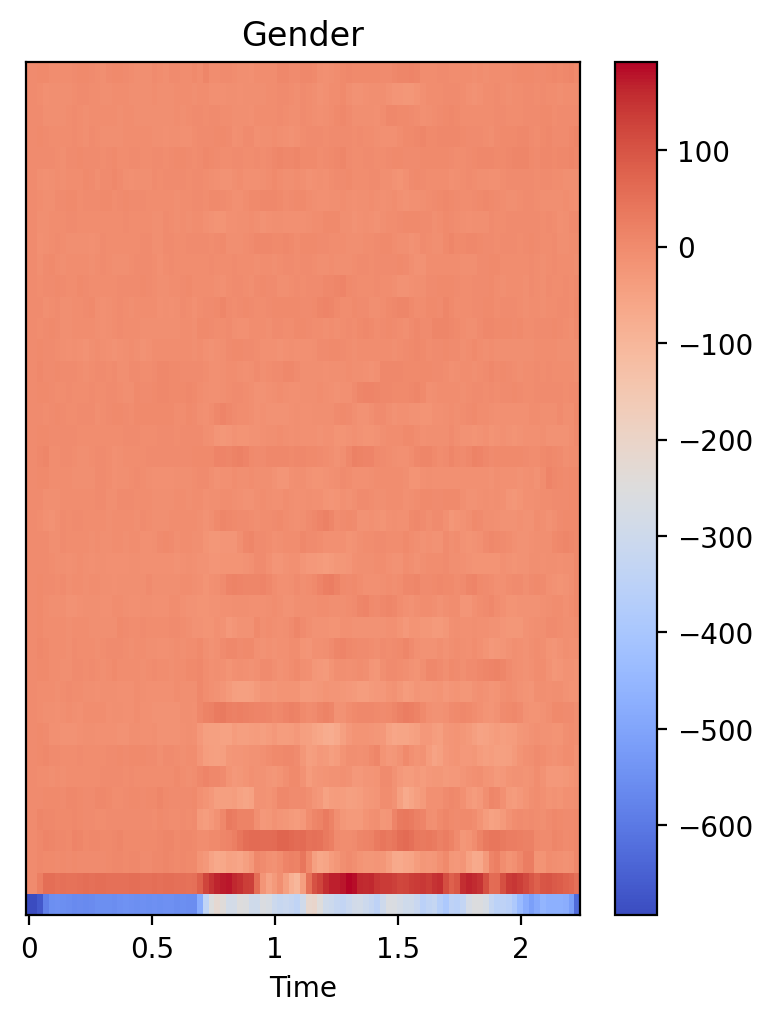

In [27]:

audio_path =  "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_1.mp3"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("Gender")

In [28]:
x = metadata_df["class"].unique()
y = metadata_df["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("class")
plt.show()

In [29]:
import matplotlib.pyplot as plt

# Plot histogram for gender
plt.figure(figsize=(8, 6))
metadata_df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Samples')
plt.show()

else
metadata_df["class"] and =1
age_mapping = {
    'eighties': 80,
    'fifties': 50,
    'fourties': 40,
    'nineties': 90,
    'seventies': 70,
    'sixties': 60,
    'teens': 10,
    'thirties': 30,
    'twenties': 20
}

In [30]:
import IPython.display as ipd
import librosa
import lazy_loader as lazy
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [31]:
#!pip install resampy

In [32]:
#!pip install --upgrade librosa

In [33]:
#!pip install resampy

In [34]:
#!pip3 install resampy

In [35]:
#!pip install pandas

In [36]:
import resampy

In [37]:
#!pip install --upgrade librosa

In [38]:
metadata_df.head()

client_id  \
0  631bb378172971f14de8fe3b26c24e78625f9e625e6487...   
1  eb93d89cfedc3884904766b869a44a41e419bd8970cd12...   
2  150eb27cc03ac0bd0131aa11580e85b2e0bf299d45ff86...   
3  fcf6378ac85cf9cd37fbbbf10baeeb004444d39772e84a...   
4  af294a21d920e11013661f4735c1ebd5df298b0c73074b...   

                           path  \
0  common_voice_en_24941071.mp3   
1  common_voice_en_25896402.mp3   
2  common_voice_en_25112156.mp3   
3  common_voice_en_23565383.mp3   
4  common_voice_en_27203538.mp3   

                                            sentence  up_votes  down_votes  \
0  Had been engaged in many petty political affairs.         2           0   
1  As regards travel expenses, only tourist class...         2           0   
2  Corwin has been on expeditions to six of the s...         2           0   
3  He maintained this association even though he ...         2           0   
4                   She moored her boat at Donguila.         2           1   

     age  gender  accent locale  segment class  
0  teens  female     NaN     en      NaN   F10  
1  teens  female     NaN     en      NaN   F10  
2  teens  female      us     en      NaN   F10  
3  teens  female      us     en      NaN   F10  
4  teens  female  indian     en      NaN   F10

In [40]:
import os
import librosa
import numpy as np
from tqdm import tqdm

# List to store the extracted features and labels
extracted = []

# Iterate over each row in the DataFrame within the specified range
#for index_num, row in tqdm(metadata_df.iloc[:1045].iterrows()):
#for index_num, row in tqdm(metadata_df.iloc[:120002].iterrows()):
for index_num, row in tqdm(metadata_df.iloc[:5999].iterrows()):
    # Get the file path
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    
    # Get the file label
    final_class_label = row["class"]
    
    # Load the audio file
    audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
    
    # Extract the features (MFCC)
    features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    
    # Feature scaling
    scaled_features = np.mean(features.T, axis=0)
    
    # Store the features and label in the list
    extracted.append([scaled_features, final_class_label])

5999it [06:01, 16.58it/s]


desired_duration=10
def feature_extractor(filename):
    data,sr = librosa.load(filename, duration = desired_duration, res_type='kaise_best')
    if len(data) < sr * desired_duration:
        data = np.pad(data, (0, sr * desired_duration - len(data)))
         
    
    mfcc_features = librosa.feature.mfcc(y=data,sr=samp_rate, n_mfcc=40)
    mfcc_scaled_features = np.mean(mfcc_features.T, axis=0)
    return mfcc_scaled_features

#Runtime - 2min 14 sec 775 iterations for 3 clips per bird
from tqdm import tqdm #Allows to see progress
extracted_features=[]
for index_num,row in tqdm(metadata_df.iterrows()):
    final_class_labels=row["class"]
    audio_dataset_path = "F:/cv-corpus-7.0-2021-07-21/en/clips"
    file_path = os.path.join(audio_dataset_path, str(row["path"]))
    data=feature_extractor(file_path)
    extracted_features.append([data,final_class_labels])

In [42]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_dffinalfemale6class.pkl")
extracted_df.head(50)

feature class
0   [-264.46933, 87.949684, -3.1675863, 52.288383,...   F10
1   [-383.92224, 90.17219, 12.357015, 18.54535, 1....   F10
2   [-554.3233, 68.74735, -5.638233, 16.660994, -2...   F10
3   [-276.37027, 87.45581, -6.636358, 42.332558, 8...   F10
4   [-356.89792, 100.46831, -7.988138, 1.3407618, ...   F10
5   [-340.1035, 98.10847, 1.688551, 4.1201806, 8.6...   F10
6   [-458.3802, 75.13021, 3.719003, 8.912568, -1.3...   F10
7   [-242.54698, 102.32238, -1.180552, 5.3457174, ...   F10
8   [-502.5768, 83.42134, 23.259592, 17.862558, 1....   F10
9   [-240.3573, 102.653114, -9.722479, 30.143032, ...   F10
10  [-342.99274, 128.74579, 7.1188393, 31.387365, ...   F10
11  [-462.4876, 74.65342, 3.7135367, 14.264135, -1...   F10
12  [-385.10696, 92.70247, -3.8584824, -0.34113514...   F10
13  [-448.1922, 85.860855, 4.9129853, 12.144244, -...   F10
14  [-353.9271, 96.20675, -10.756918, 25.892794, -...   F10
15  [-281.24078, 114.43606, -2.8998792, 30.30214, ...   F10
16  [-298.8287, 99.05959, -17.421719, 12.662228, -...   F10
17  [-397.09775, 70.36323, -17.197392, 23.967207, ...   F10
18  [-394.933, 15.820112, -9.614939, 56.908897, -1...   F10
19  [-477.78564, 79.4336, -1.9202845, 7.136021, 0....   F10
20  [-483.18805, 69.87302, 3.9011924, 13.597587, 2...   F10
21  [-380.79562, 143.80763, 2.684811, -16.112, 3.5...   F10
22  [-428.56842, 72.55241, -2.565737, 12.357984, 5...   F10
23  [-342.57568, 74.51776, 3.6633692, 14.135002, -...   F10
24  [-396.2853, 90.1527, -4.6680617, 31.676235, -9...   F10
25  [-310.5238, 116.760635, 1.5831002, 20.28491, -...   F10
26  [-366.93604, 93.42194, -10.386602, 1.6707488, ...   F10
27  [-337.16458, 113.69913, -13.231762, 8.348209, ...   F10
28  [-310.1484, 121.41993, -5.167699, 10.579563, -...   F10
29  [-319.6325, 88.82213, -7.381943, 8.970517, -19...   F10
30  [-399.23407, 71.12949, 3.7815428, 17.475368, -...   F10
31  [-334.7655, 56.62575, -8.021058, 29.31664, 4.6...   F10
32  [-372.19214, 138.38297, 2.2214236, 14.744891, ...   F10
33  [-312.50195, 58.807144, 2.4894135, 28.97071, 8...   F10
34  [-275.14478, 89.61416, 2.4626315, 41.565674, 0...   F10
35  [-297.48657, 98.65302, -18.30364, 6.530743, -1...   F10
36  [-308.1766, 73.70597, -22.964754, 28.245787, -...   F10
37  [-373.5388, 86.664444, -7.7002807, 13.967794, ...   F10
38  [-309.73758, 52.99525, -26.318565, 22.1006, 9....   F10
39  [-374.91617, 68.715294, -0.87323105, 22.626213...   F10
40  [-330.43933, 89.6677, -11.3015585, 32.637276, ...   F10
41  [-332.86267, 86.247635, -20.05521, 26.578224, ...   F10
42  [-443.95883, 46.198383, -0.023567574, 18.78553...   F10
43  [-301.9861, 105.64383, -22.981602, -2.511862, ...   F10
44  [-434.1861, 91.72872, -28.647423, 11.717403, -...   F10
45  [-305.5114, 80.71791, -19.76789, 35.242855, -1...   F10
46  [-395.9966, 92.77245, 25.930391, 13.108612, -1...   F10
47  [-449.28543, 42.576843, 14.499368, 43.598724, ...   F10
48  [-354.02148, 87.149376, -18.475082, 30.571117,...   F10
49  [-396.3629, 87.80882, -1.1168631, 20.391472, -...   F10

# create a new dataframe
extracted = []
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df1.pkl")
extracted_df.head(55)

## Data Preprocessing
### Distribute the data to X and Y

In [43]:
final = pd.read_pickle("extracted_dffinalfemale6class.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

### Split the data into train and test sets

In [44]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  4799
Number of testing samples =  1200


### Model 1 - ANN
#### Building the model

In [45]:

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,410,956 (5.38 MB)

 Trainable params: 1,410,956 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model

In [46]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

## Fitting the model

In [47]:
num_epochs = 250
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("ANN_Model.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

Epoch 1/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2248 - loss: 4.3752 - val_accuracy: 0.4067 - val_loss: 1.4742
Epoch 2/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4145 - loss: 1.4192 - val_accuracy: 0.4758 - val_loss: 1.3311
Epoch 3/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4897 - loss: 1.2666 - val_accuracy: 0.5133 - val_loss: 1.2136
Epoch 4/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5363 - loss: 1.1710 - val_accuracy: 0.5067 - val_loss: 1.2263
Epoch 5/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5687 - loss: 1.0989 - val_accuracy: 0.5342 - val_loss: 1.1476
Epoch 6/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5996 - loss: 1.0036 - val_accuracy: 0.5733 - val_loss: 1.0898
Epoch 7/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6413 - loss: 0.9187 - val_accuracy: 0.5733 - val_loss: 1.0820
Epoch 8/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6527 - loss: 0.8904 - val_accu

ANN Model Saved


## Results

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

In [49]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)

In [50]:
# function to predict the feature
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("ANN has predicted the class as  --> ", predicted_class[0])

In [51]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_18944712.mp3"
# get the output
ANN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
ANN has predicted the class as  -->  F50


In [52]:
# Evaluate the performance of the speaker recognition model
speaker_loss, speaker_accuracy = ANN_Model.evaluate(X_test, y_test)
print(f"Speaker Recognition Accuracy: {speaker_accuracy * 100:.2f}%")

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 5.0260
Speaker Recognition Accuracy: 77.42%


In [57]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = ANN_Model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = ANN_Model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['F10', 'F20', 'F30', 'F40', 'F50', 'F60']

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(report)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       215
           1       0.70      0.67      0.69       208
           2       0.70      0.73      0.72       186
           3       0.78      0.75      0.76       197
           4       0.82      0.79      0.80       189
           5       0.88      0.91      0.89       205

    accuracy                           0.77      1200
   macro avg       0.77      0.77      0.77      1200
weighted avg       0.77      0.77      0.77      1200

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

         F10       0.76      0.79      0.78       215
         F20       0.70      0.67      0.69       208
         F30       0.70      0.73      0.72       186
         F40       0.78      0.75      0.76       197
         F50       0.82      0.79      0.80       189
         F60       0.88      0.91      0.89       205


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[169  23  10   8   3   2]
 [ 20 140  23  11  10   4]
 [ 14  16 136  11   4   5]
 [ 12   9  11 147  10   8]
 [  4   8  12   8 150   7]
 [  2   4   1   4   7 187]]


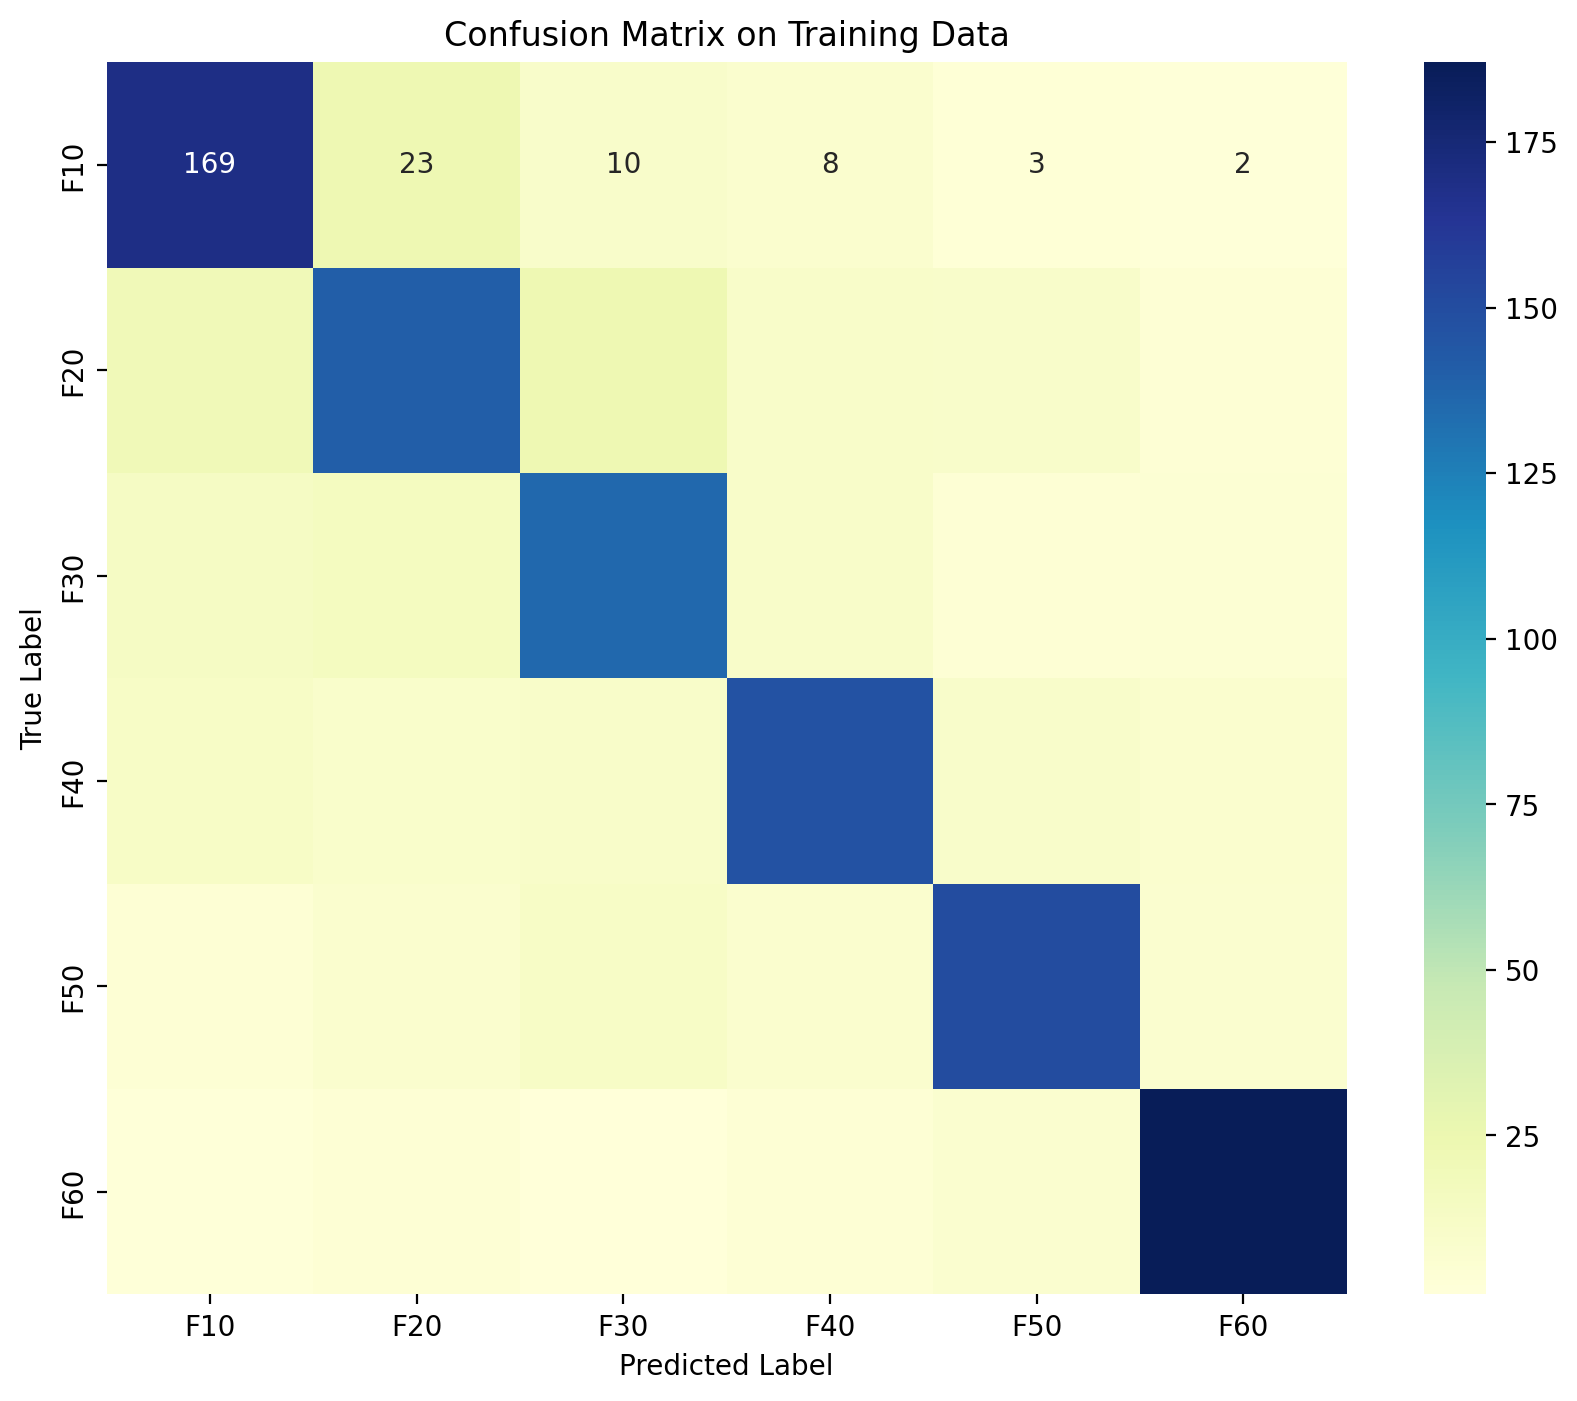

Accuracy   : 0.7741666666666667
Precision  : 0.7733830893617949
Recall     : 0.7737241732344639
F1-score   : 0.7733110642158683


In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import time
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = ANN_Model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = ANN_Model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[F10,F20,F30,F40,F50,F60], columns=[F10,F20,F30,F40,F50,F60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision, recall, F1-score, and accuracy
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
precision = precision_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
recall = recall_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')
f1 = f1_score(y_test.argmax(axis=1), y_test_pred_classes, average='macro')

print("Accuracy   :", accuracy)
print("Precision  :", precision)
print("Recall     :", recall)
print("F1-score   :", f1)

## Model 2 - CNN### 
Preprocessing

In [59]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(128, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1000, activation='relu'))
cnn_model.add(Dense(750, activation='relu'))
cnn_model.add(Dense(500, activation='relu'))
cnn_model.add(Dense(250, activation='relu'))
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(50, activation='relu'))
num_classes = 6 # Replace 3 with the actual number of classes in your data
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 126, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 63, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 61, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1000)           │     3,841,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147,916 (19.64 MB)

 Trainable params: 5,147,916 (19.64 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_results=cnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2900 - loss: 1.7154 - val_accuracy: 0.4300 - val_loss: 1.3638
Epoch 2/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4852 - loss: 1.2524 - val_accuracy: 0.5317 - val_loss: 1.1709
Epoch 3/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5958 - loss: 1.0327 - val_accuracy: 0.5817 - val_loss: 1.0890
Epoch 4/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6749 - loss: 0.8403 - val_accuracy: 0.5692 - val_loss: 1.1183
Epoch 5/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7578 - loss: 0.6433 - val_accuracy: 0.6633 - val_loss: 1.0084
Epoch 6/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8430 - loss: 0.4668 - val_accuracy: 0.6917 - val_loss: 0.9745
Epoch 7/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8971 - loss: 0.3086 - val_accuracy: 0.6792 - val_loss: 1.0587
Epoch 8/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9205 - loss: 0.2464 - 

In [61]:
cnn_model.save("cnn_model.h5")
print("cnn_model  Saved")

cnn_model  Saved


In [62]:
train_hist_m2 = pd.DataFrame(cnn_results.history)
train_m2 = round(time.time() - t0, 3)

In [63]:
# function to predict the feature
def CNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(cnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN has predicted the class as  --> ", predicted_class[0])

In [64]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
CNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
CNN has predicted the class as  -->  F50


In [66]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['F10', 'F20', 'F30', 'F40', 'F50', 'F60']

# Generate classification report
classification_report_output = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(classification_report_output)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

         F10       0.72      0.78      0.75       215
         F20       0.61      0.61      0.61       208
         F30       0.59      0.72      0.65       186
         F40       0.82      0.65      0.72       197
         F50       0.76      0.73      0.74       189
         F60       0.88      0.85      0.87       205

    accuracy                           0.72      1200
   macro avg       0.73      0.72      0.72      1200
weighted avg       0.73      0.72      0.72      1200



In [70]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['F10', 'F20', 'F30', 'F40', 'F50', 'F60']

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(classification_report)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_pred_classes)
print(confusion_mat)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu",
           xticklabels=labels,
           yticklabels=labels)
plt.title('Confusion Matrix for ANN(12 Class:with perfect Age)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

         F10       0.72      0.78      0.75       215
         F20       0.61      0.61      0.61       208
         F30       0.59      0.72      0.65       186
         F40       0.82      0.65      0.72       197
         F50       0.76      0.73      0.74       189
         F60       0.88      0.85      0.87       205

    accuracy                           0.72      1200
   macro avg       0.73      0.72      0.72      1200
weighted avg       0.73      0.72      0.72      1200

[[168  24  14   3   6   0]
 [ 25 126  27   8  12  10]
 [ 13  19 133   7  10   4]
 [ 14  17  21 128  11   6]
 [ 12  13  17   5 138   4]
 [  1   6  12   6   5 175]]


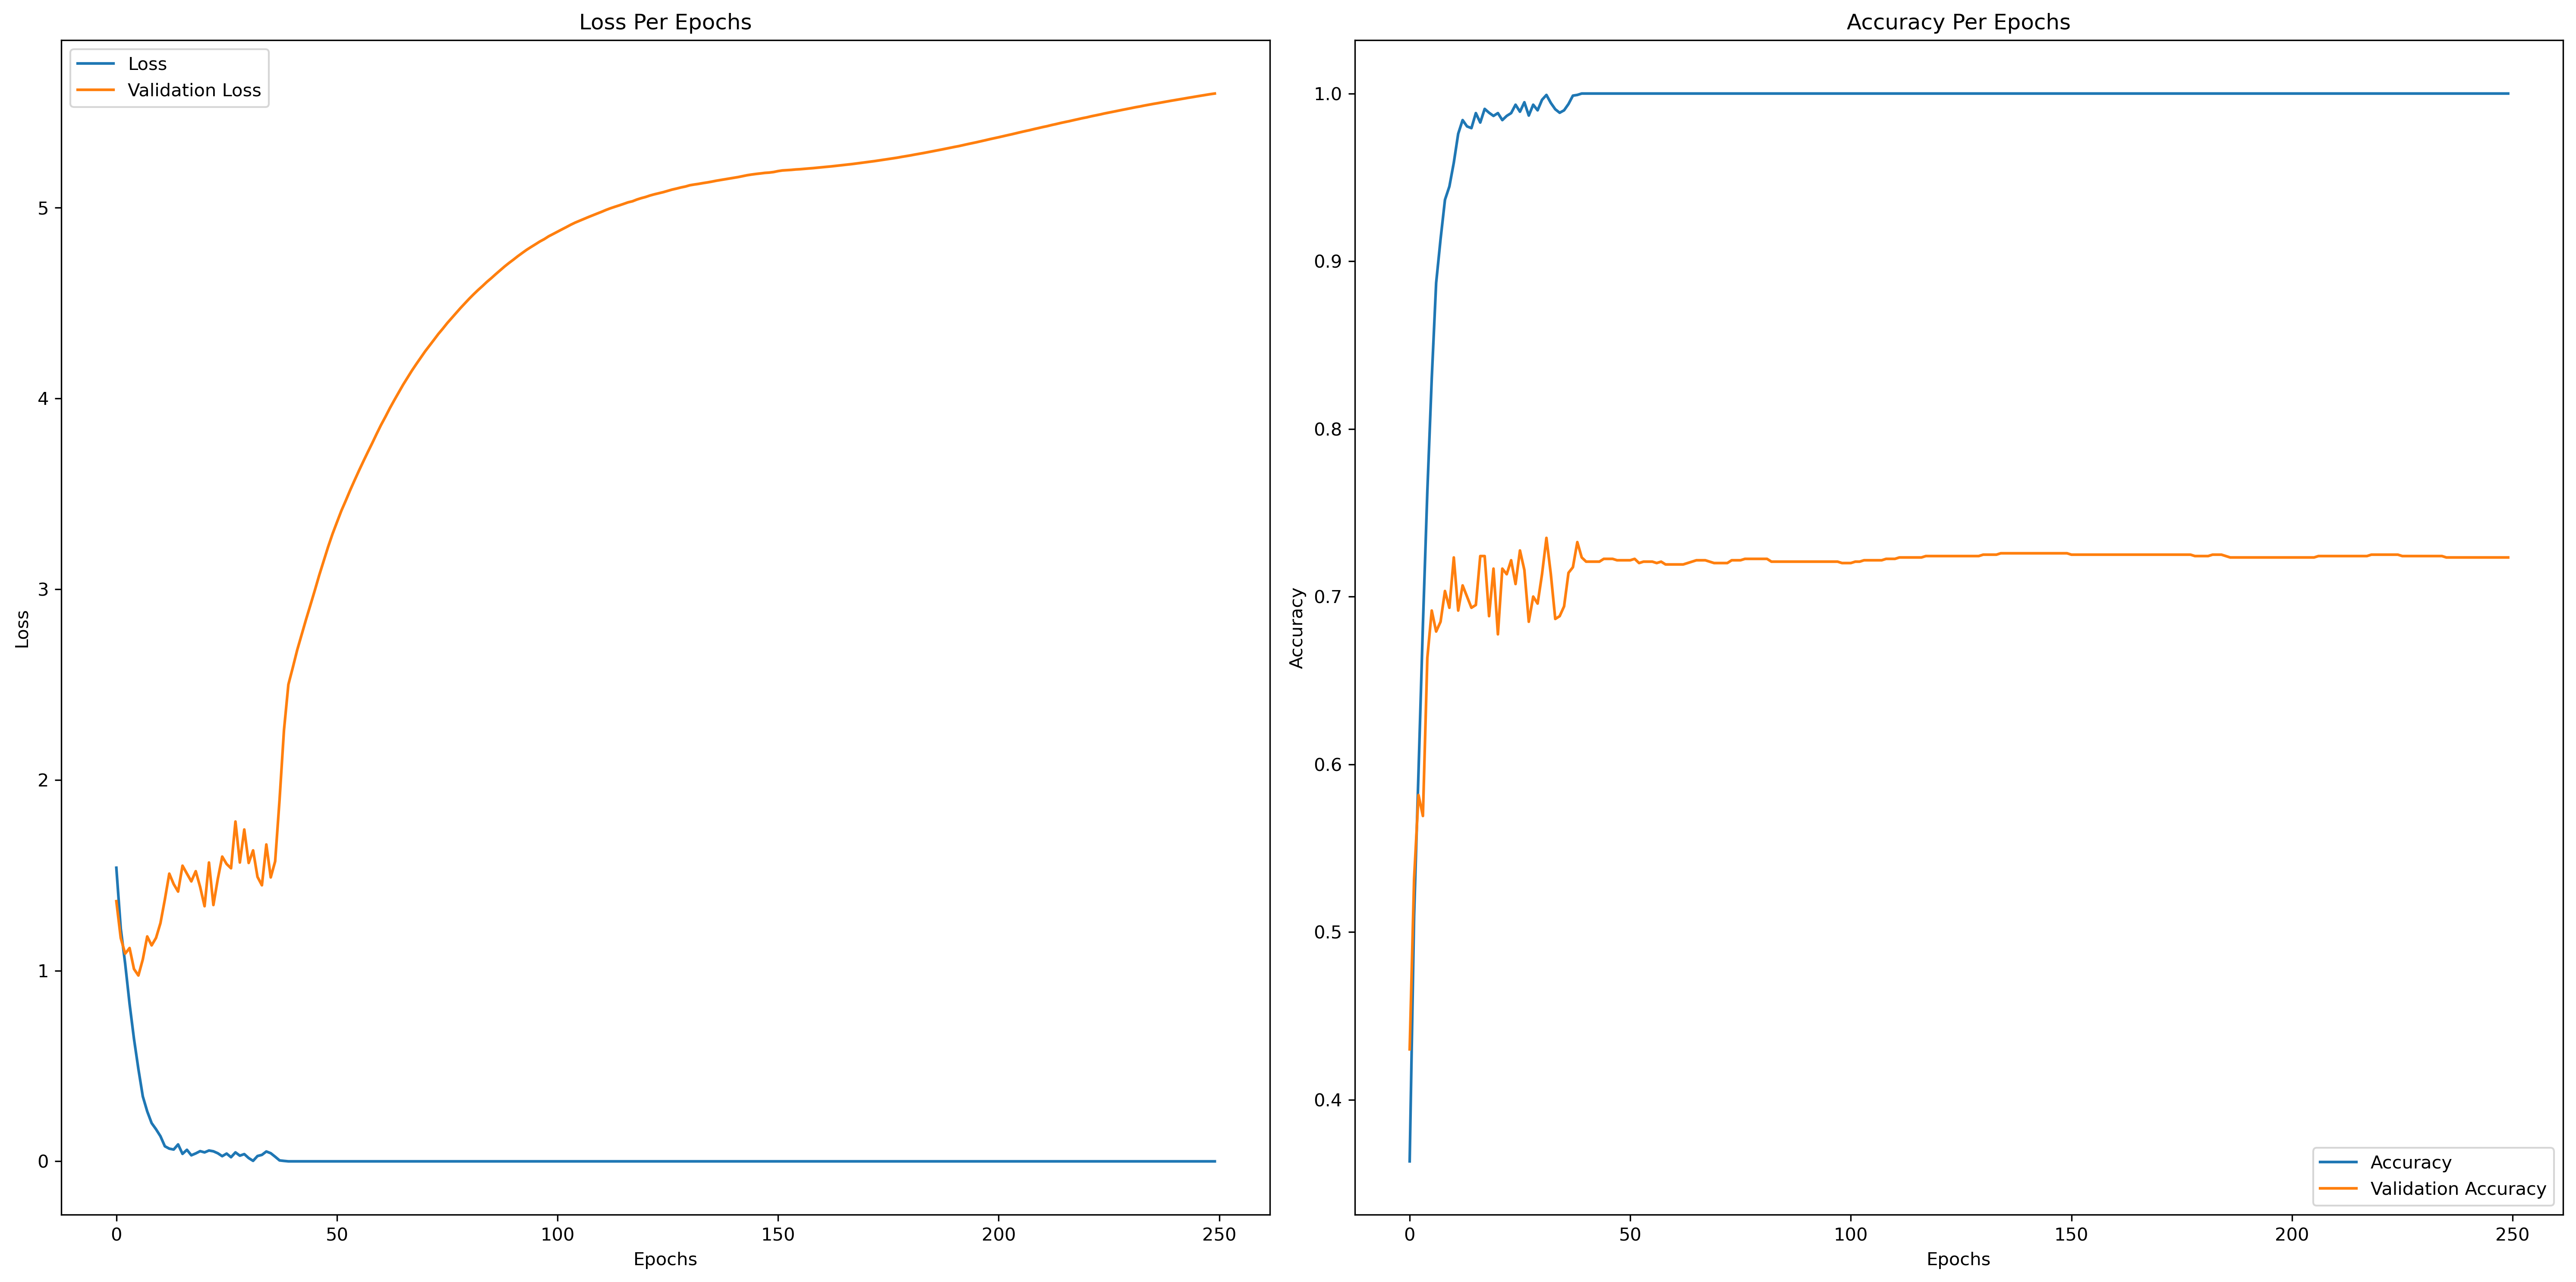

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m2[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[168  24  14   3   6   0]
 [ 25 126  27   8  12  10]
 [ 13  19 133   7  10   4]
 [ 14  17  21 128  11   6]
 [ 12  13  17   5 138   4]
 [  1   6  12   6   5 175]]


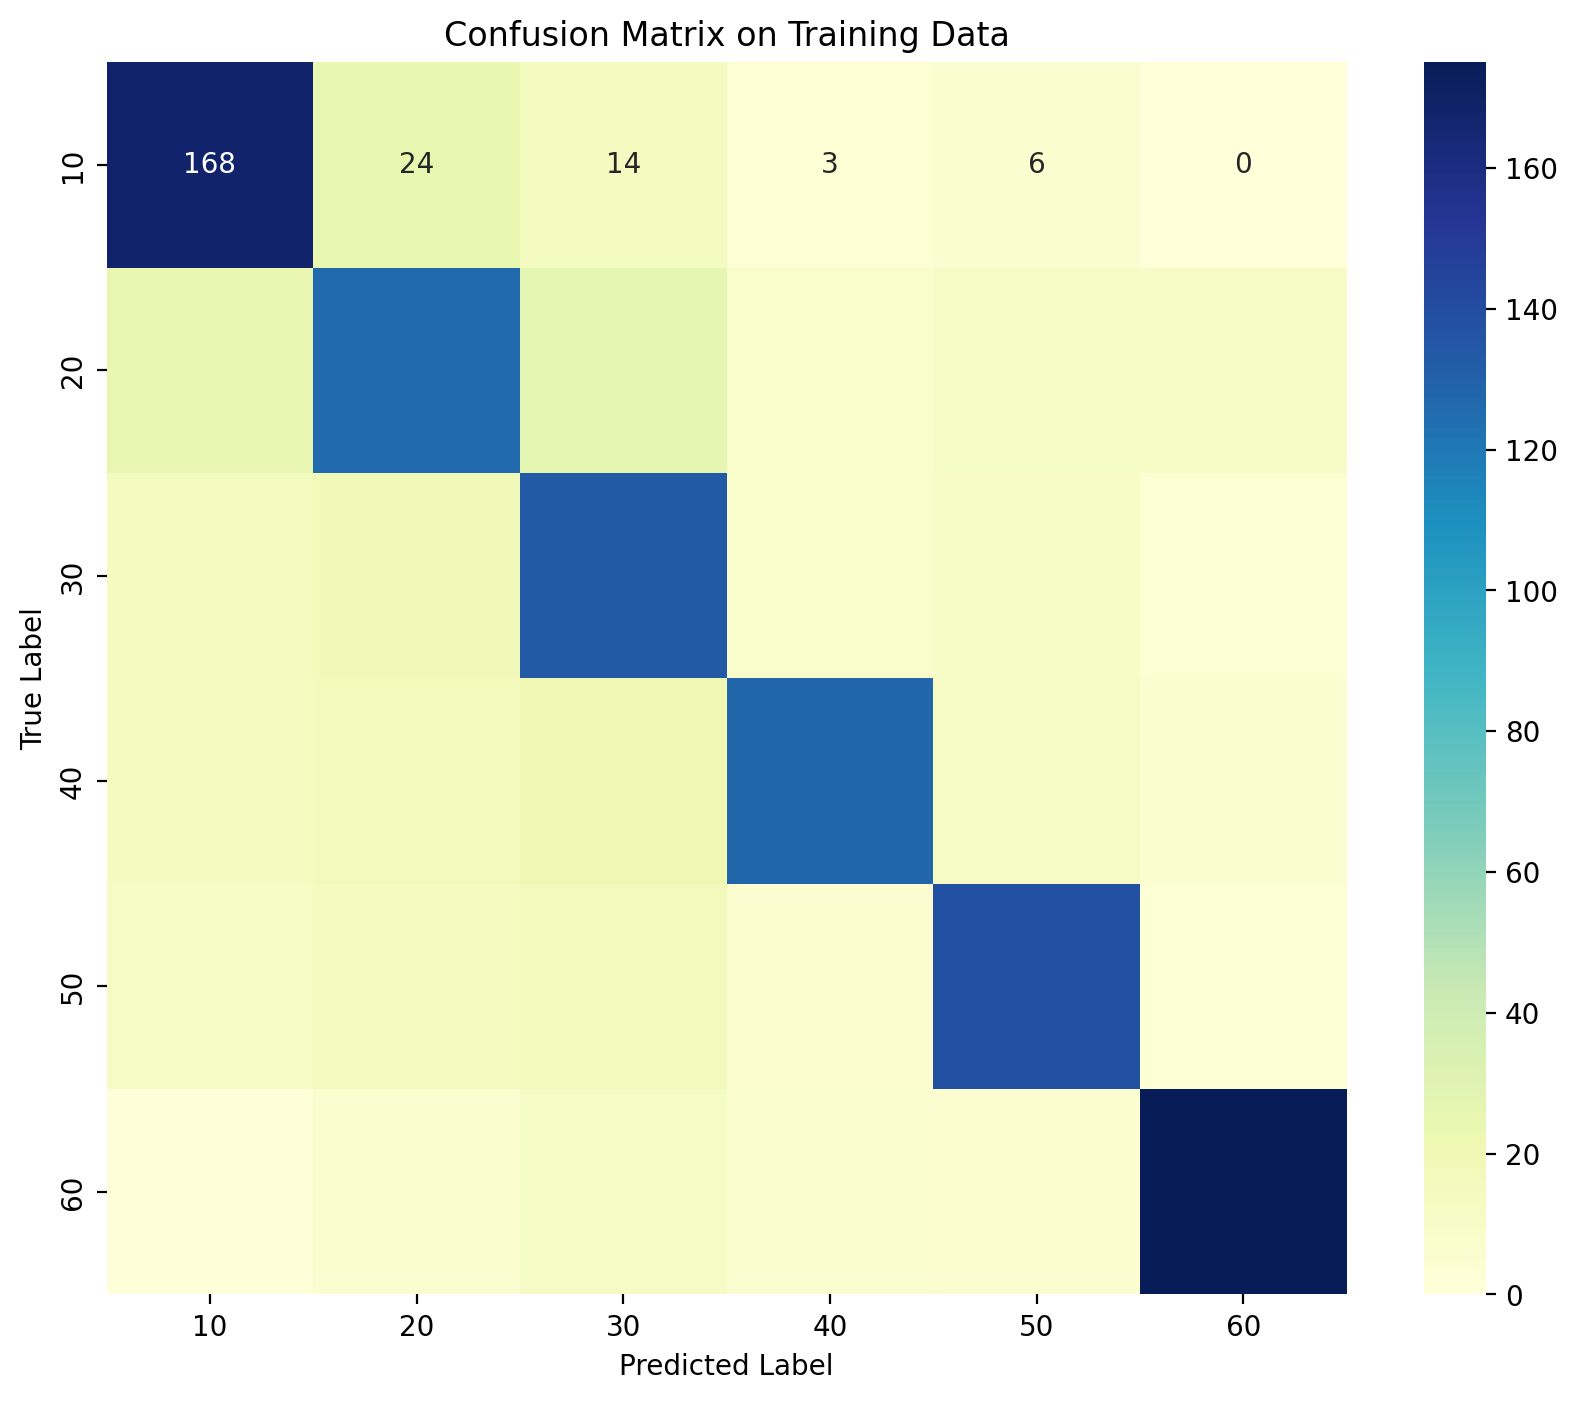

Accuracy   : 0.7233333333333334


In [72]:
train_hist_m1 = pd.DataFrame(cnn_results.history)
train_m1 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = cnn_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = cnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
labels = ['F10', 'M10', 'F20', 'M20', 'F30', 'M30', 'F40', 'M40', 'F50', 'M50', 'F60', 'M60']
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

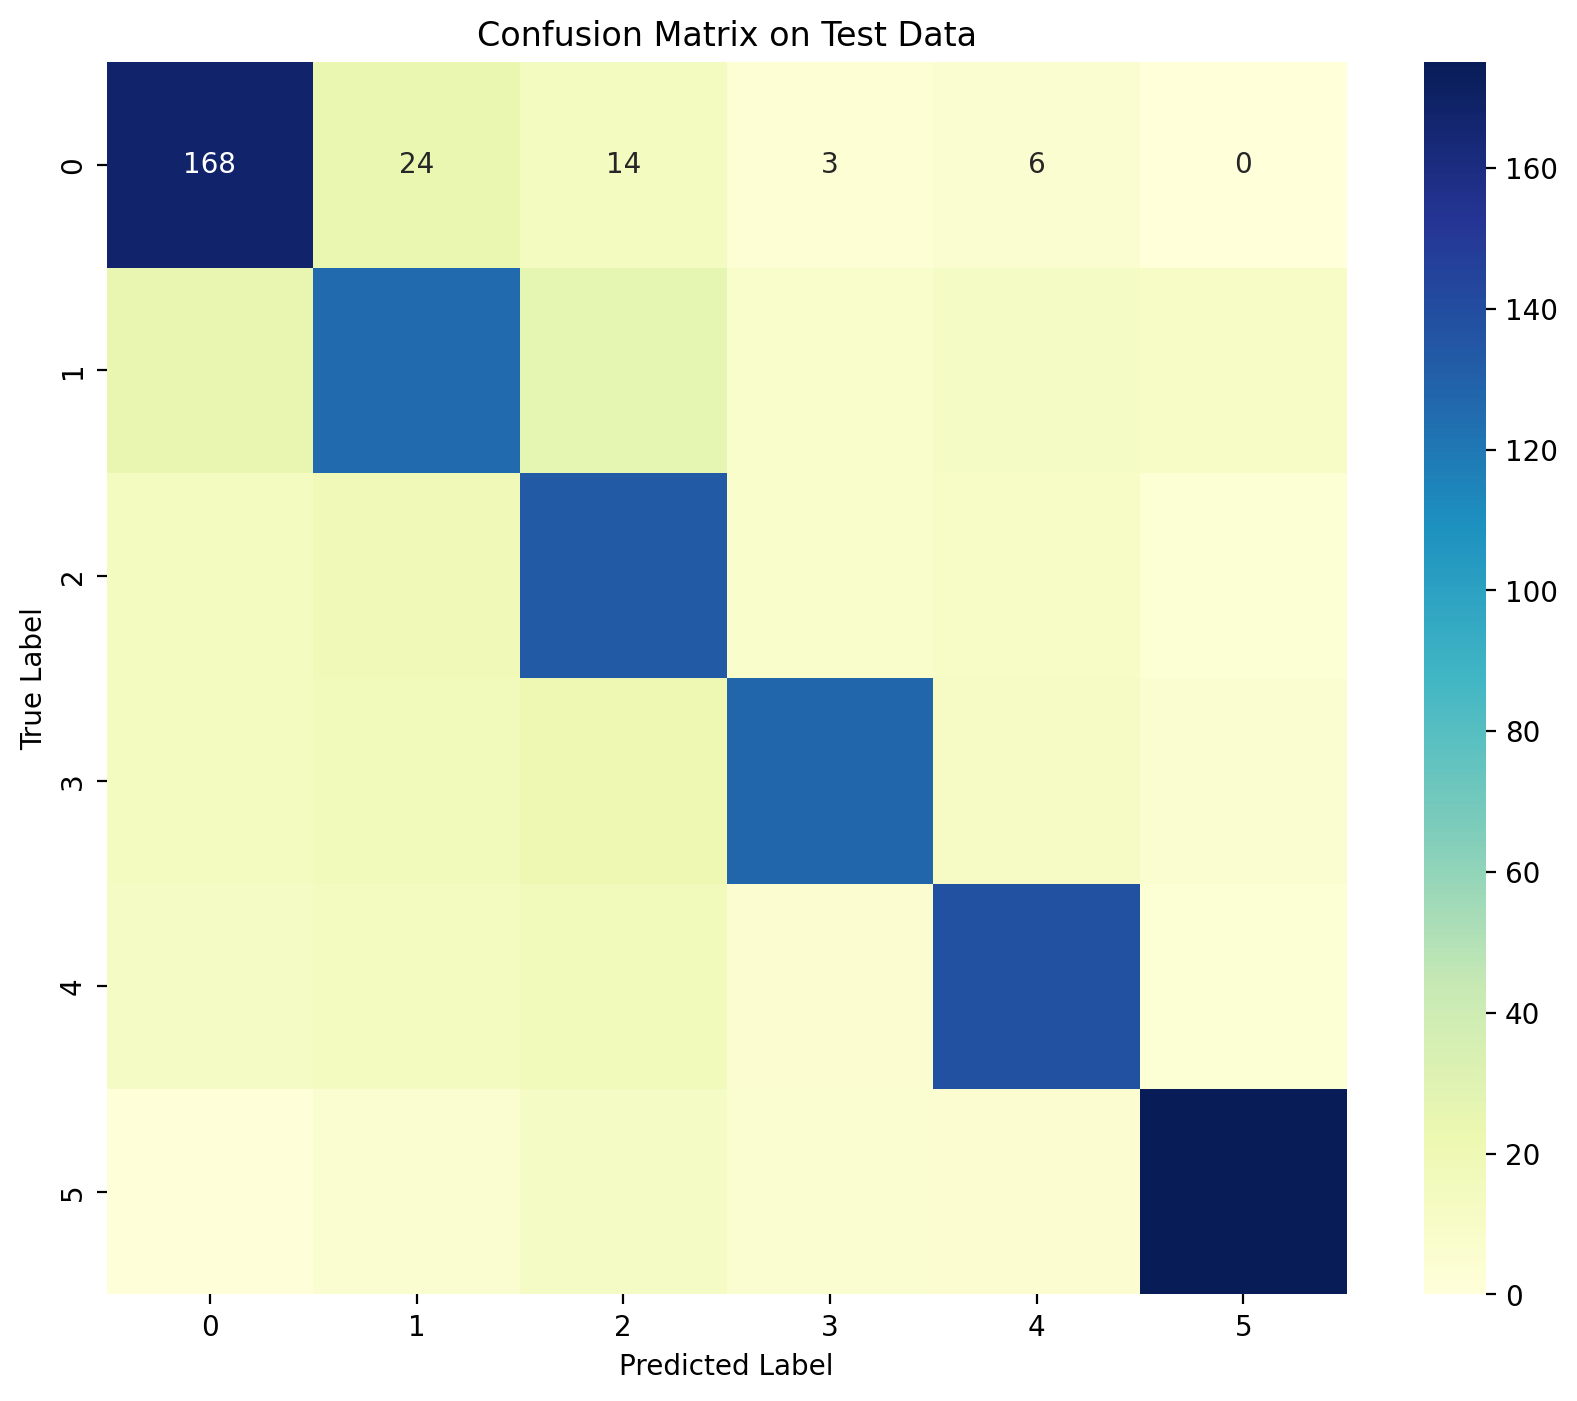

In [73]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)

# Get the unique class labels
class_labels = np.unique(y_test.argmax(axis=1))

# Create the confusion matrix DataFrame
df_cm = pd.DataFrame(confusion_mat, index=class_labels, columns=class_labels)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Model 3-LSTM

In [74]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1000, activation='relu'))
lstm_model.add(Dense(750, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(250, activation='relu'))
lstm_model.add(Dense(100, activation='relu'))
lstm_model.add(Dense(50, activation='relu'))
num_classes = 6  # Replace 3 with the actual number of classes in your data
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,852 (5.20 MB)

 Trainable params: 1,363,852 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_results=lstm_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.1812 - loss: 1.8080 - val_accuracy: 0.1925 - val_loss: 1.7772
Epoch 2/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.1934 - loss: 1.7652 - val_accuracy: 0.1942 - val_loss: 1.7514
Epoch 3/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2229 - loss: 1.7235 - val_accuracy: 0.2050 - val_loss: 1.7455
Epoch 4/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2394 - loss: 1.7145 - val_accuracy: 0.2108 - val_loss: 1.7552
Epoch 5/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2287 - loss: 1.7187 - val_accuracy: 0.2200 - val_loss: 1.7464
Epoch 6/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2344 - loss: 1.7153 - val_accuracy: 0.2517 - val_loss: 1.7407
Epoch 7/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2493 - loss: 1.7167 - val_accuracy: 0.2217 - val_loss: 1.7445
Epoch 8/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.2532 - loss: 1.6944 - 

In [76]:
lstm_model.save("lstm_model.h5")
print("lstm_model  Saved")

lstm_model  Saved


In [77]:
# function to predict the feature
def LSTM_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(lstm_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("LSTM has predicted the class as  --> ", predicted_class[0])

In [78]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
LSTM_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
LSTM has predicted the class as  -->  F50


In [80]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
#y_pred = cnn_model.predict(X_test)
#y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['F10', 'F20', 'F30', 'F40', 'F50', 'F60']

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(classification_report)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       215
           1       0.40      0.40      0.40       208
           2       0.39      0.44      0.41       186
           3       0.59      0.52      0.55       197
           4       0.47      0.56      0.51       189
           5       0.79      0.72      0.75       205

    accuracy                           0.53      1200
   macro avg       0.54      0.53      0.53      1200
weighted avg       0.54      0.53      0.54      1200

              precision    recall  f1-score   support

         F10       0.59      0.55      0.57       215
         F20       0.40      0.40      0.40       208
         F30       0.39      0.44      0.41       186
         F40       0.59      0.52      0.55       197
         F50       0.47      0.56      0.51       189
         F60       0.79      0.72      0.75       205

    accuracy                          

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[119  46  17  12  19   2]
 [ 40  83  37  21  18   9]
 [ 14  38  81  13  31   9]
 [ 12  17  24 103  29  12]
 [ 13  15  27  20 106   8]
 [  2   7  20   7  22 147]]


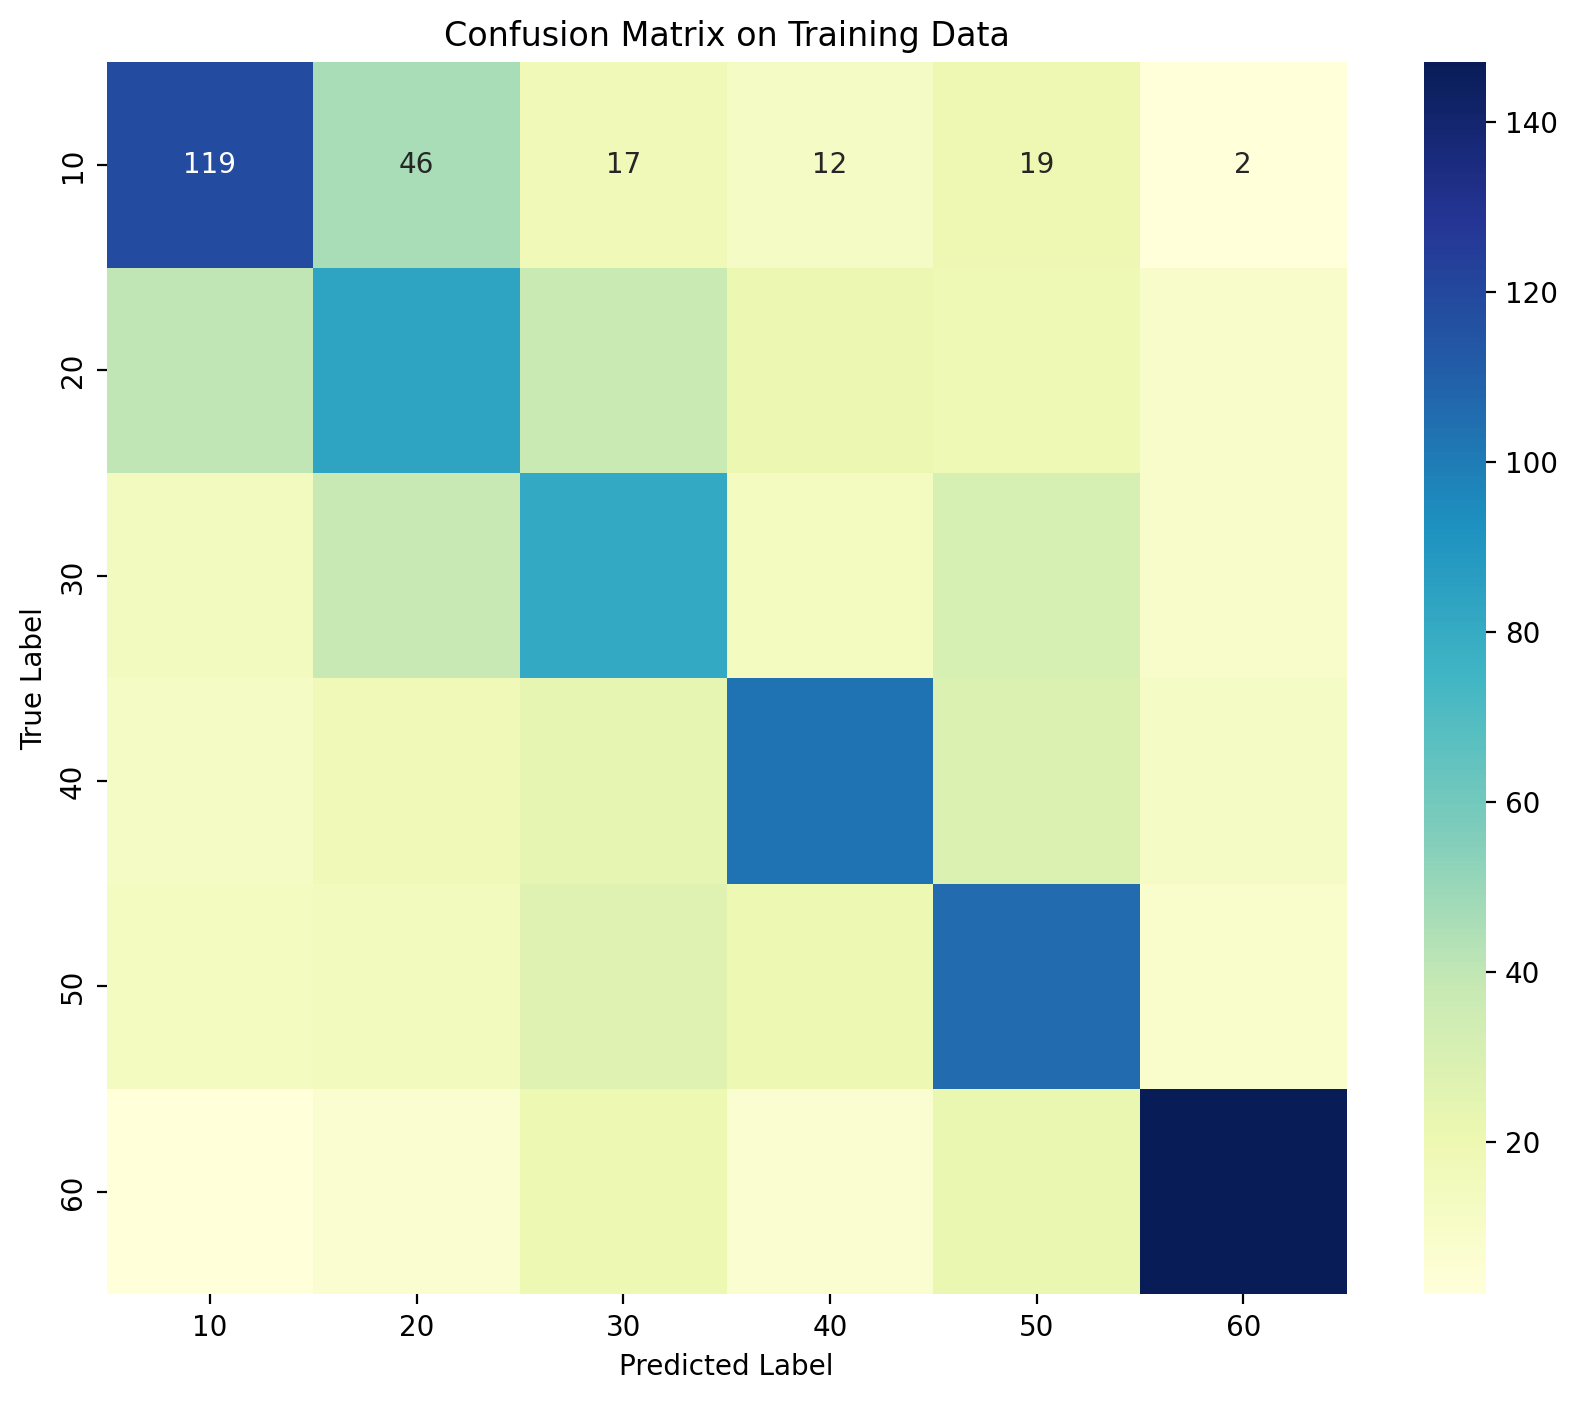

Accuracy   : 0.5325


In [82]:
train_hist_m3 = pd.DataFrame(lstm_results.history)
train_m3 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = lstm_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = lstm_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

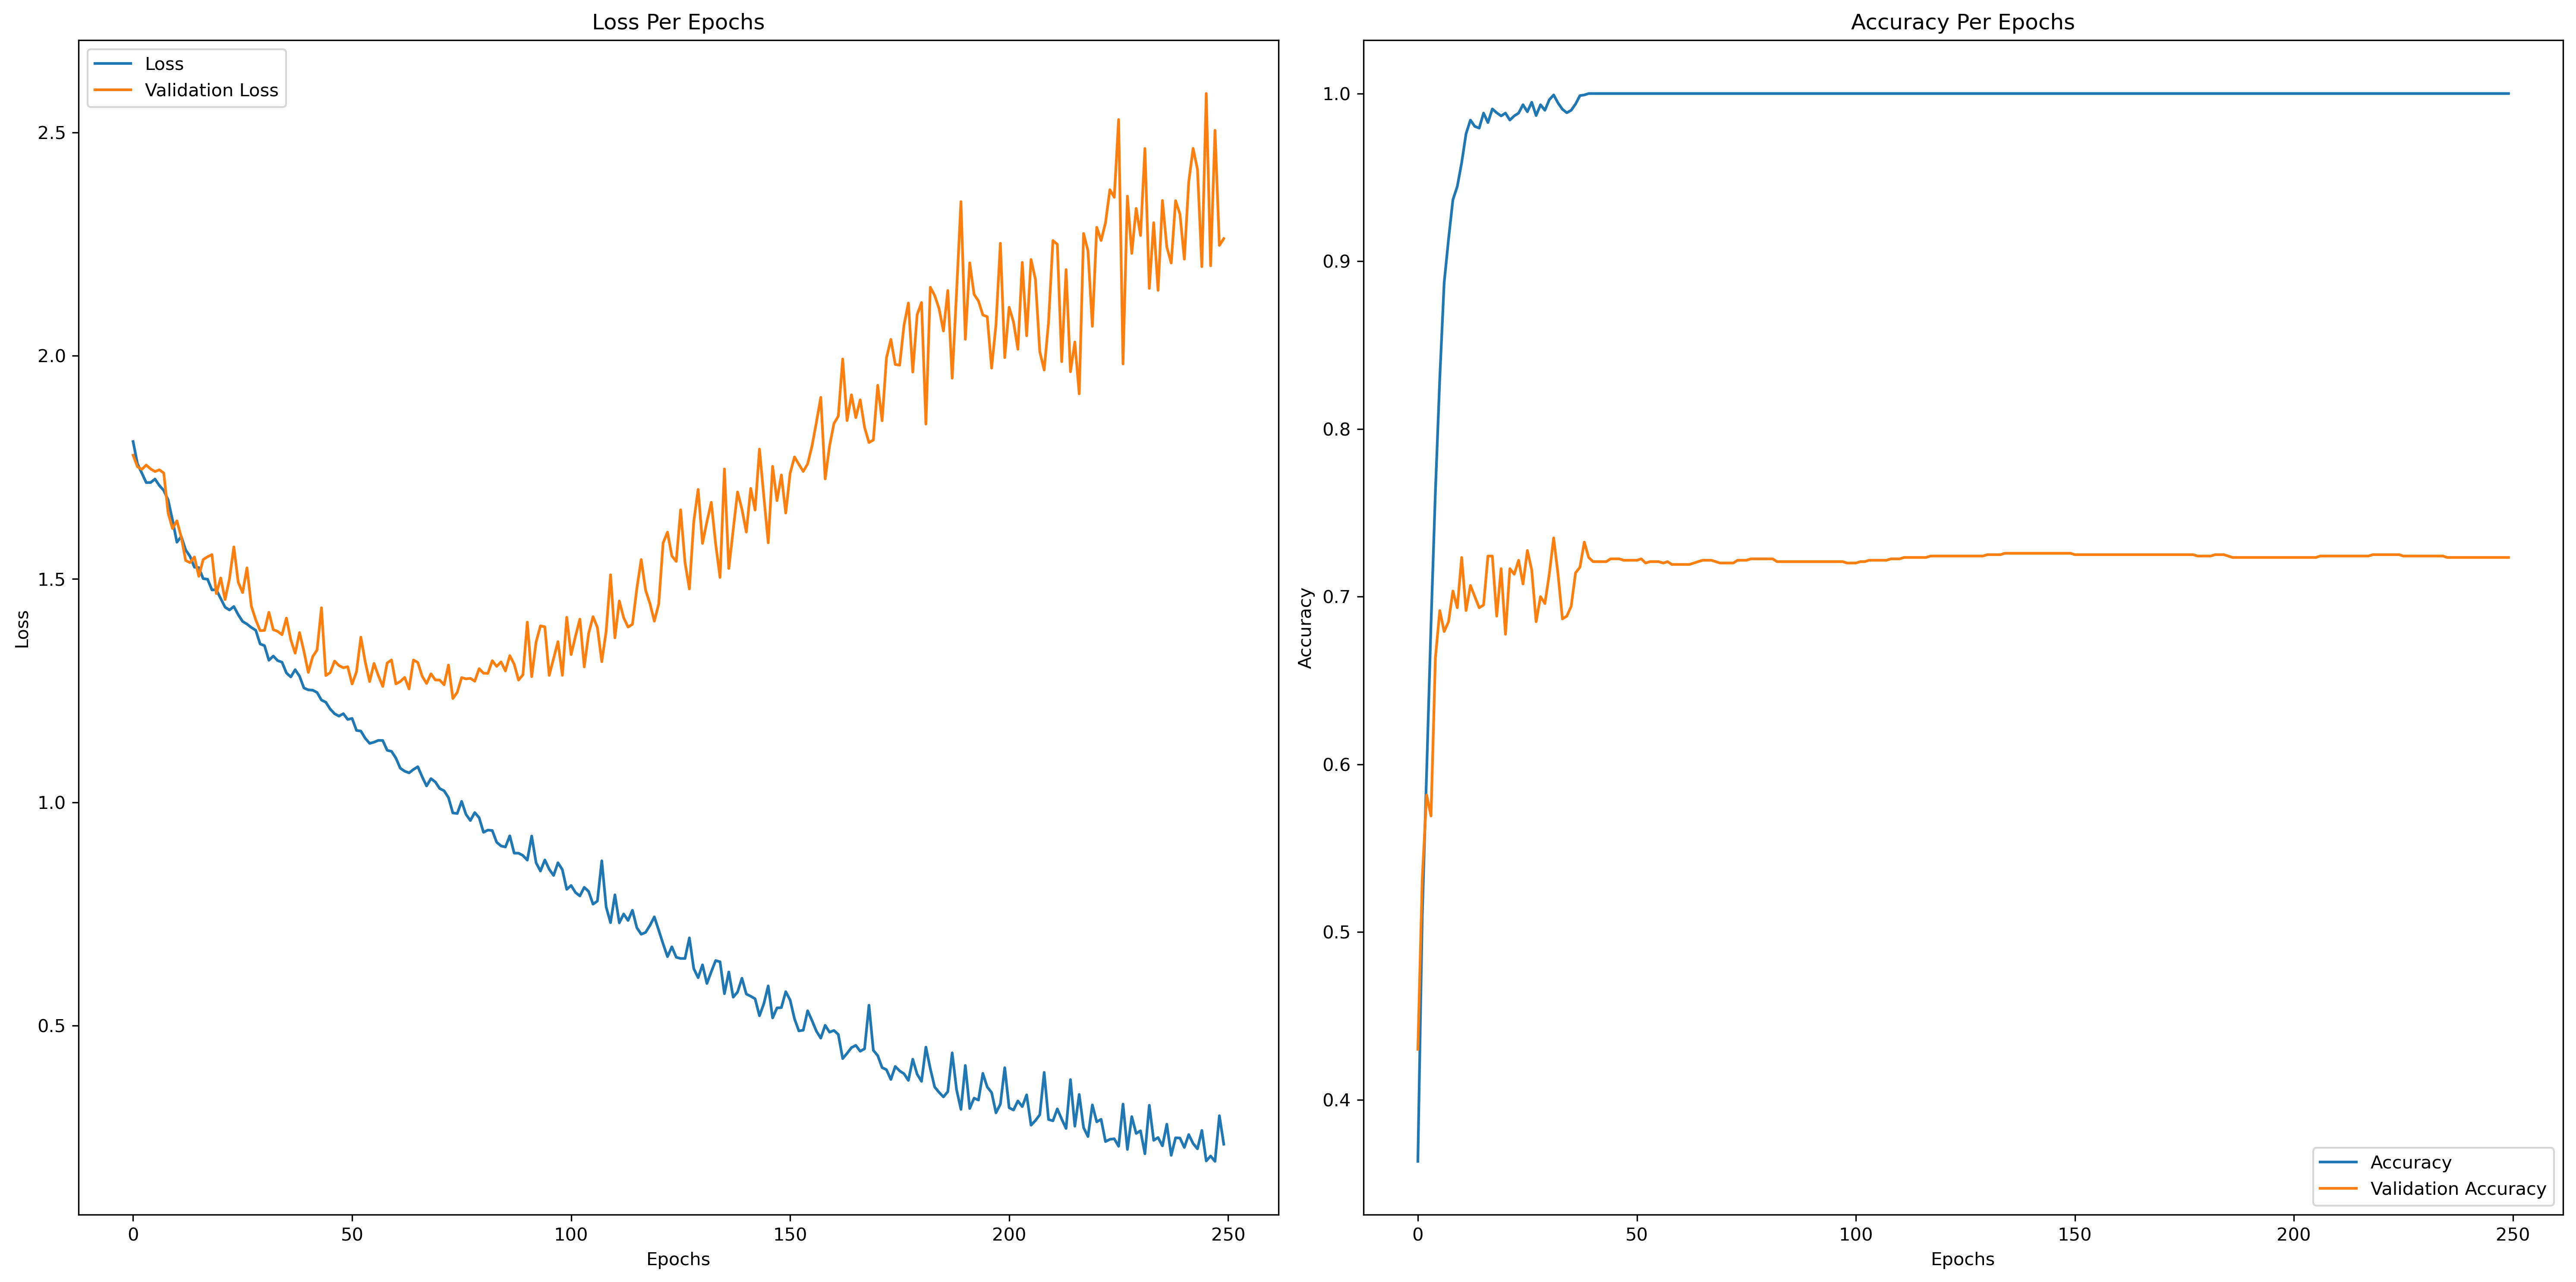

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

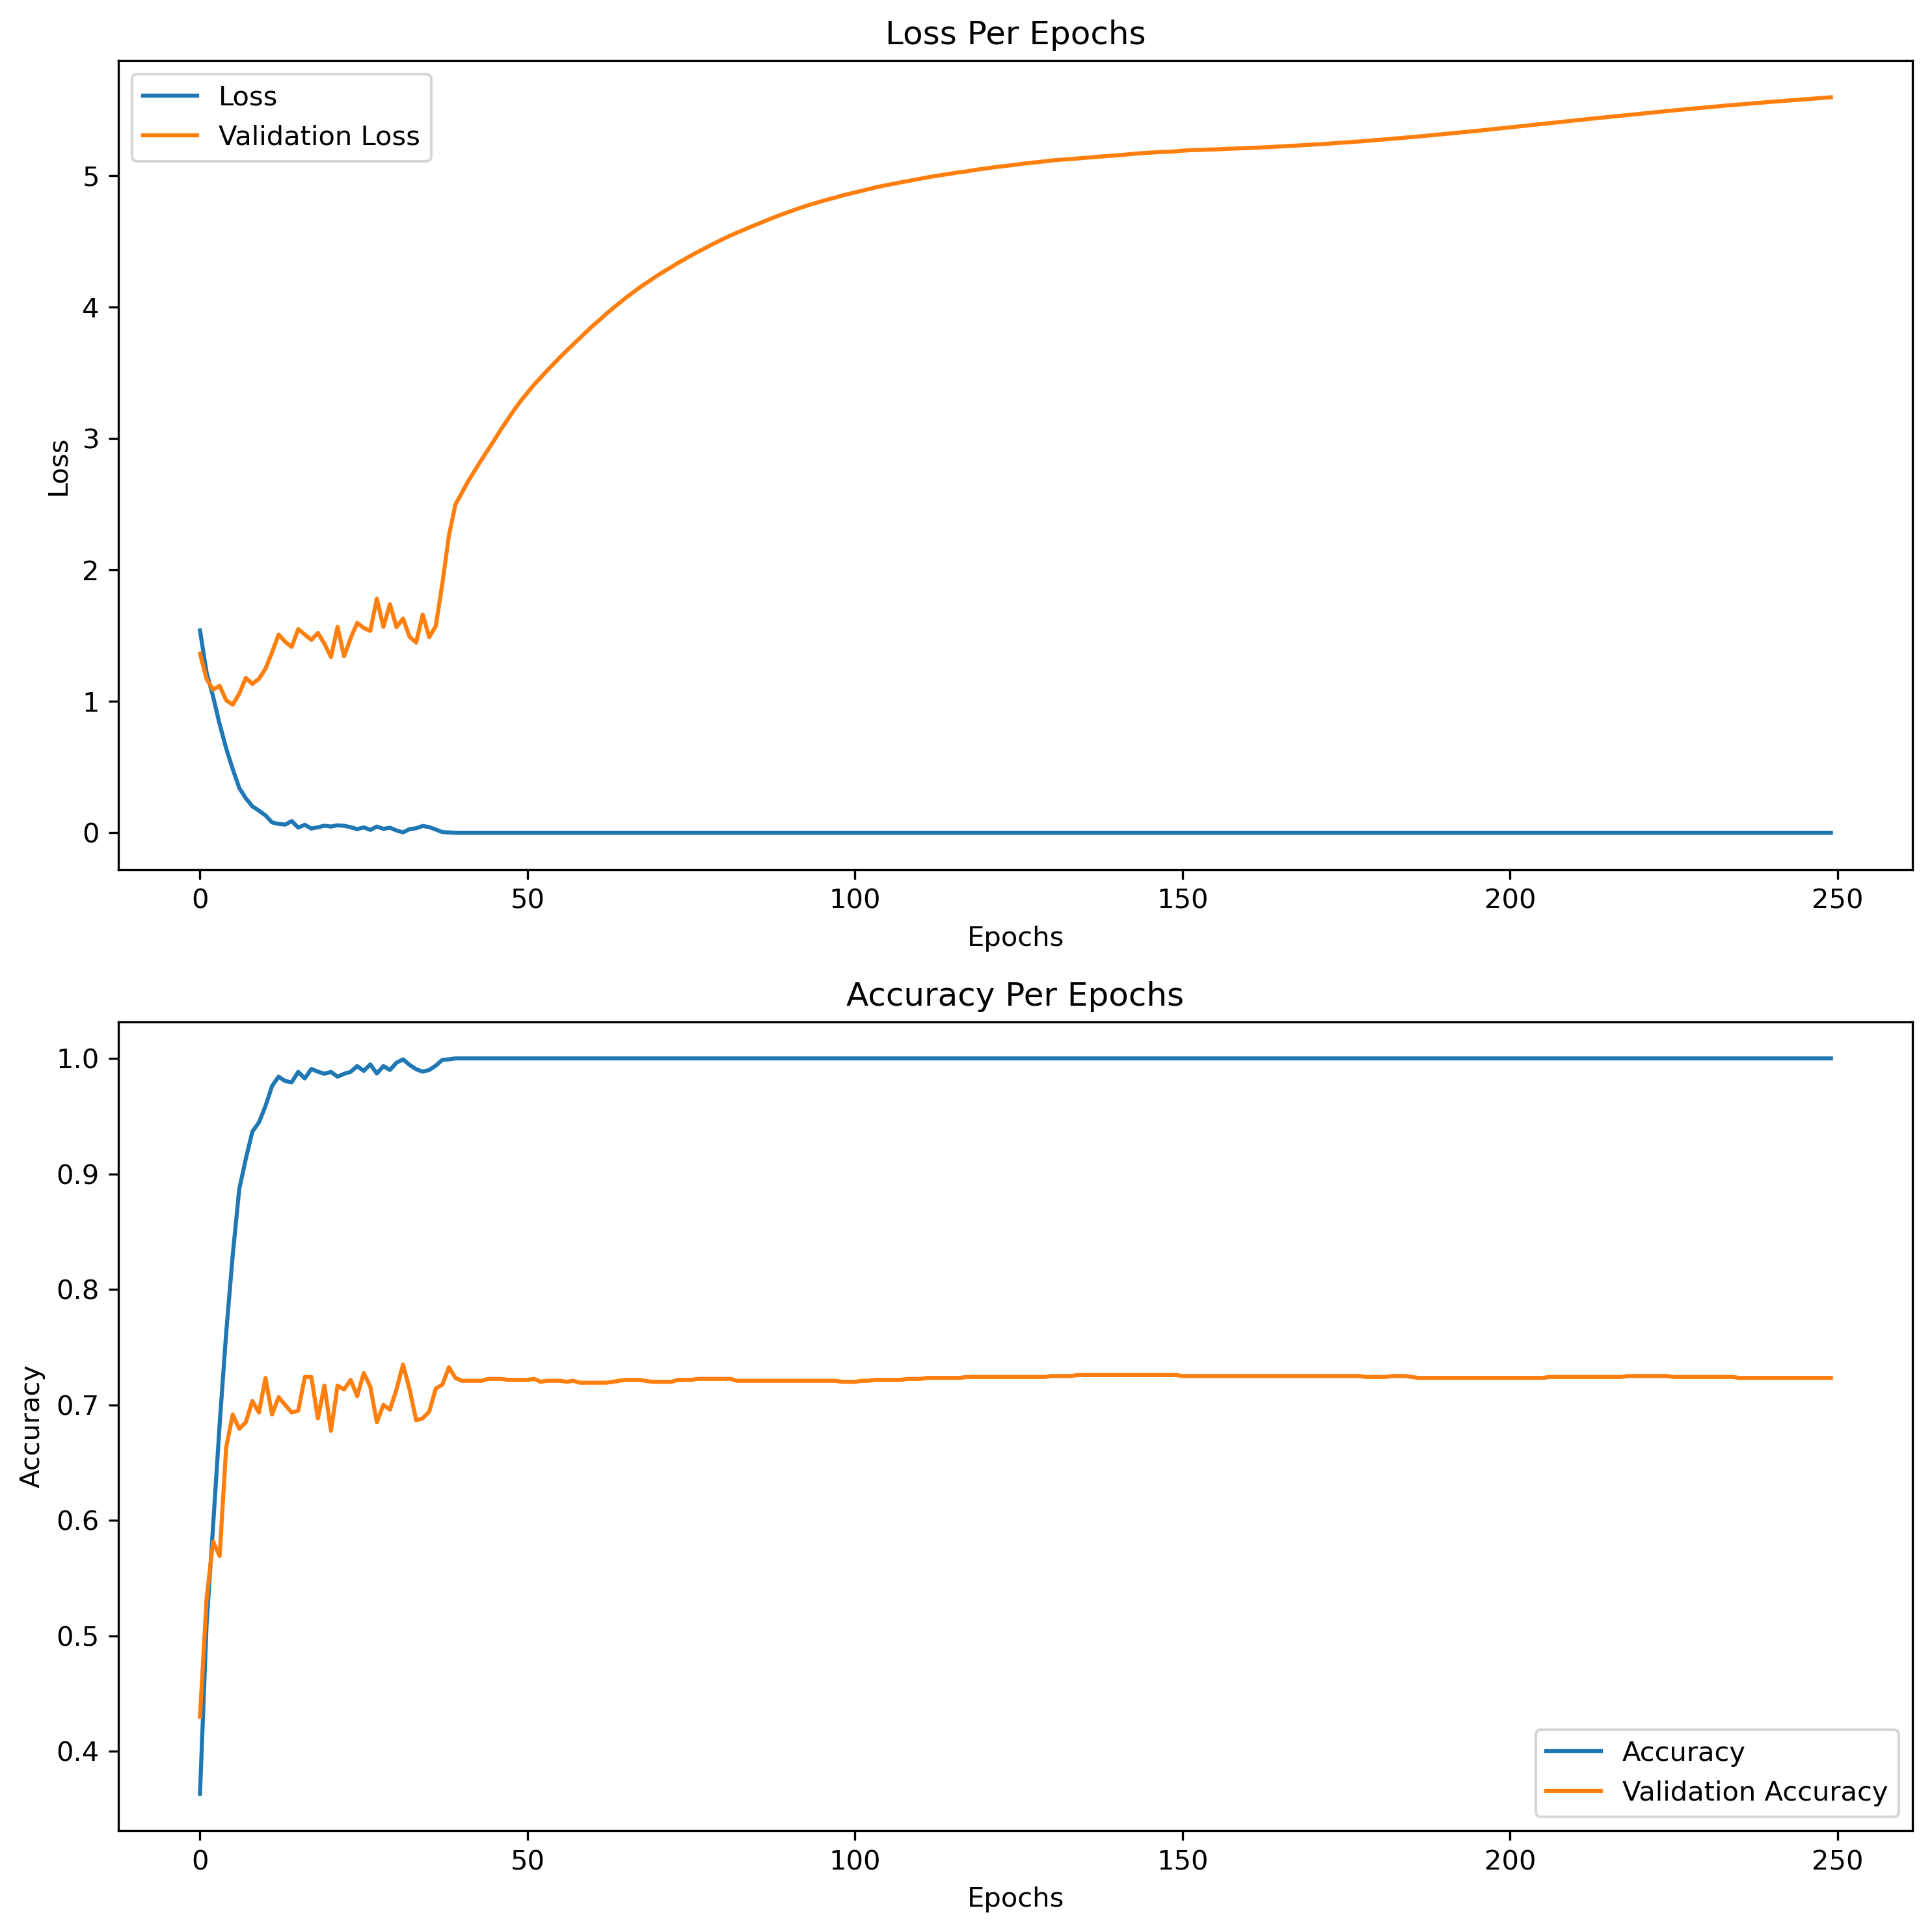

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(2, 1, 1)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(2, 1, 2)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[119  46  17  12  19   2]
 [ 40  83  37  21  18   9]
 [ 14  38  81  13  31   9]
 [ 12  17  24 103  29  12]
 [ 13  15  27  20 106   8]
 [  2   7  20   7  22 147]]


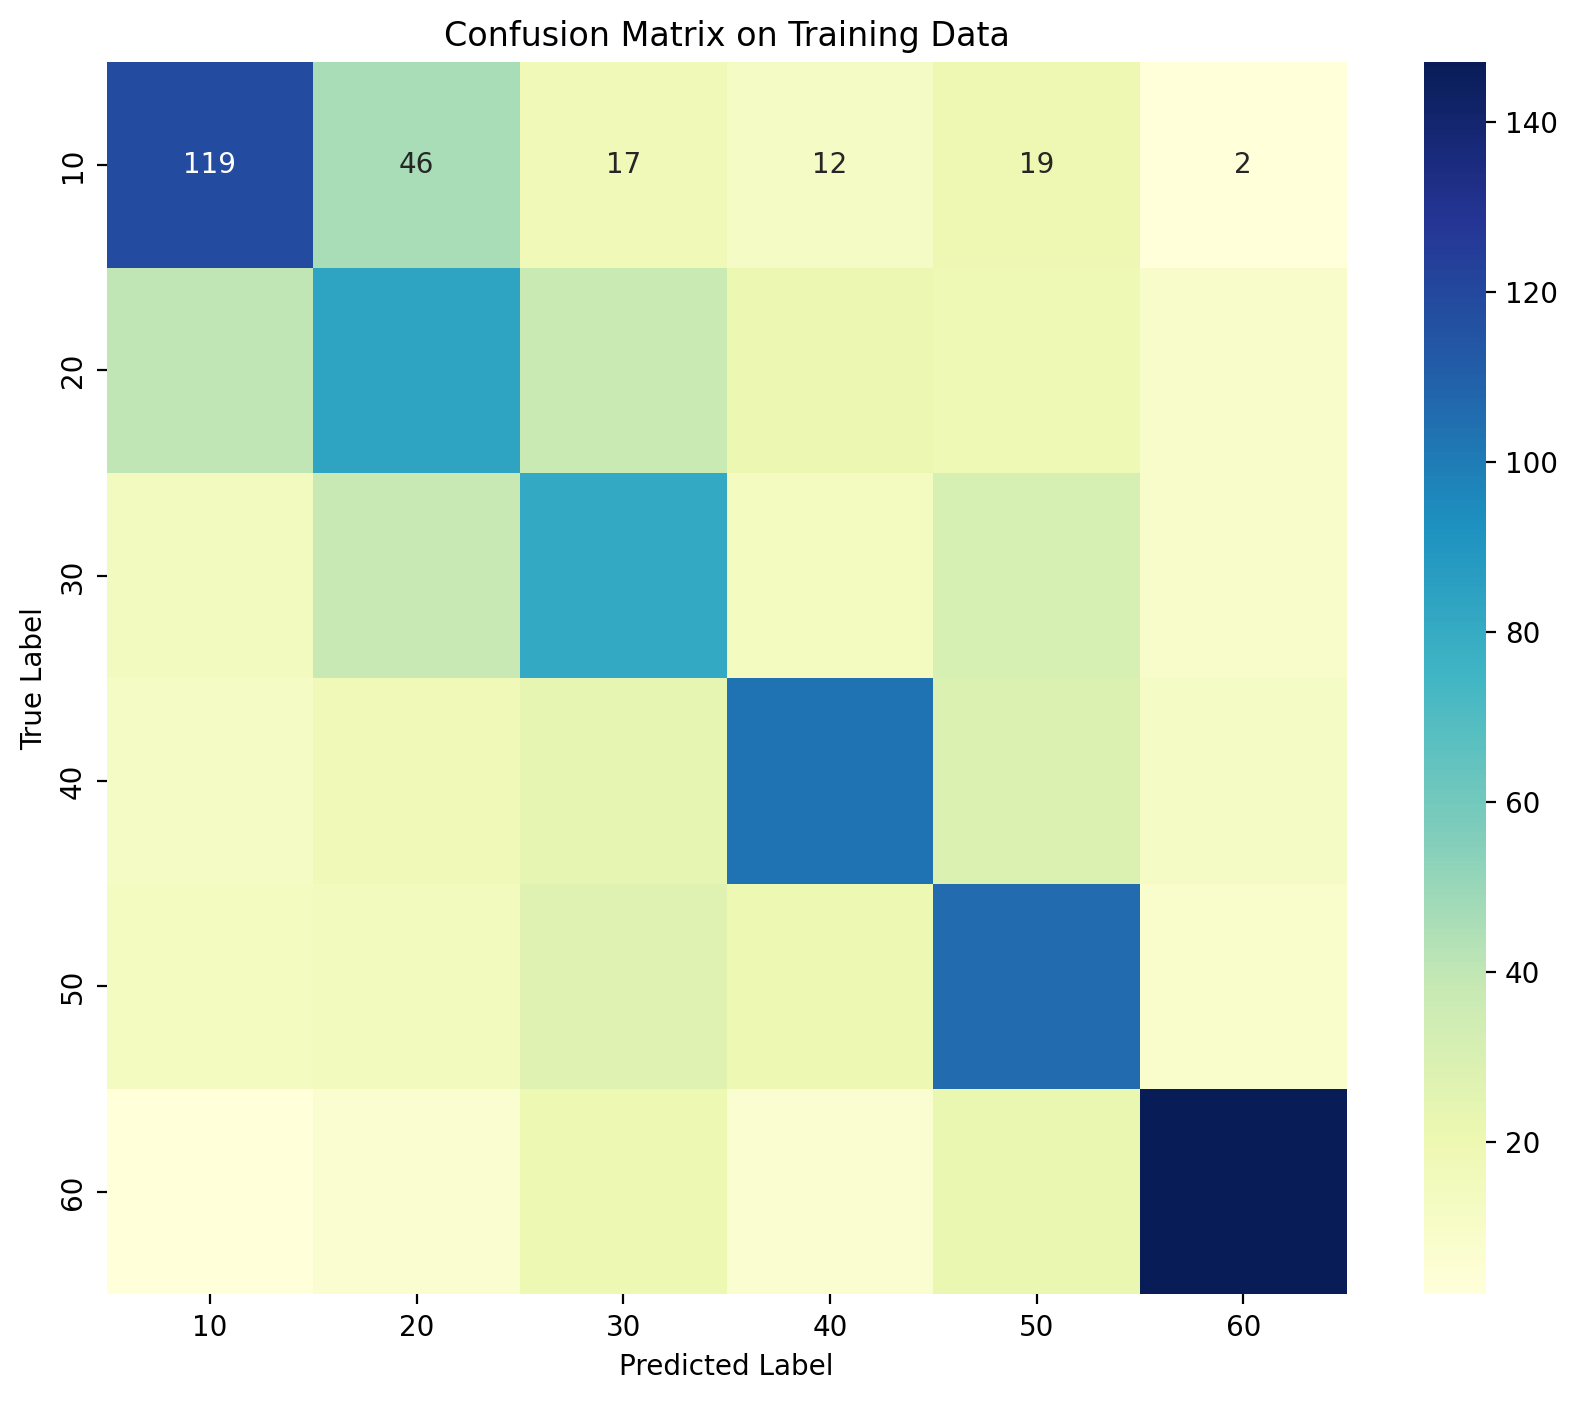

Accuracy   : 0.5325


In [87]:
# Get the model predictions on the training data
# preduction
y_pred = lstm_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = lstm_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

## RNN

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1000, activation='relu'))
rnn_model.add(Dense(750, activation='relu'))
rnn_model.add(Dense(500, activation='relu'))
rnn_model.add(Dense(250, activation='relu'))
rnn_model.add(Dense(100, activation='relu'))
rnn_model.add(Dense(50, activation='relu'))
num_classes = 6  # Replace 3 with the actual number of classes in your data
rnn_model.add(Dense(num_classes, activation='softmax'))

rnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1000)           │        65,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 6)              │           306 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,363,852 (5.20 MB)

 Trainable params: 1,363,852 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_results=rnn_model.fit(X_train, y_train, epochs=250, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.1927 - loss: 1.7761 - val_accuracy: 0.2175 - val_loss: 1.7549
Epoch 2/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2196 - loss: 1.7267 - val_accuracy: 0.2067 - val_loss: 1.7465
Epoch 3/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2159 - loss: 1.7191 - val_accuracy: 0.2025 - val_loss: 1.8039
Epoch 4/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.2089 - loss: 1.7286 - val_accuracy: 0.1875 - val_loss: 1.7490
Epoch 5/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2081 - loss: 1.7165 - val_accuracy: 0.1892 - val_loss: 1.8191
Epoch 6/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2252 - loss: 1.7304 - val_accuracy: 0.2142 - val_loss: 1.7461
Epoch 7/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2298 - loss: 1.7157 - val_accuracy: 0.1783 - val_loss: 1.7488
Epoch 8/250
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.2123 - loss: 1.7118 - 

In [90]:
lstm_model.save("rnn_model.h5")
print("rnn_model  Saved")

rnn_model  Saved


In [91]:
# function to predict the feature
def RNN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(rnn_model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("RNN has predicted the class as  --> ", predicted_class[0])

In [92]:
# File name
file_name = "F:/cv-corpus-7.0-2021-07-21/en/clips/common_voice_en_20088957.mp3"
# get the output
RNN_Prediction(file_name)
# play the file
ipd.Audio(file_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
RNN has predicted the class as  -->  F50


In [96]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
classification_report = classification_report(y_test.argmax(axis=1), y_pred_classes)
print(classification_report)
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['F10', 'F20', 'F30', 'F40', 'F50', 'F60']

# Generate classification report
report = classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels)
print(report)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       215
           1       0.40      0.34      0.37       208
           2       0.41      0.49      0.45       186
           3       0.51      0.54      0.52       197
           4       0.52      0.53      0.53       189
           5       0.82      0.76      0.79       205

    accuracy                           0.53      1200
   macro avg       0.53      0.53      0.53      1200
weighted avg       0.54      0.53      0.53      1200

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
              precision    recall  f1-score   support

         F10       0.54      0.54      0.54       215
         F20       0.40      0.34      0.37       208
         F30       0.41      0.49      0.45       186
         F40       0.51      0.54      0.52       197
         F50       0.52      0.53      0.53       189
         F60       0.82      0.76      0.79       205


In [97]:
from sklearn.metrics import classification_report

# Get the model predictions
y_pred = rnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Define the labels for the classification report
labels = ['F10', 'M10', 'F20', 'M20', 'F30', 'M30', 'F40', 'M40', 'F50', 'M50', 'F60', 'M60']

# Generate classification report
print(classification_report(y_test.argmax(axis=1), y_pred_classes, target_names=labels))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


ValueError: Number of classes, 6, does not match size of target_names, 12. Try specifying the labels parameter

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[116  44  20  20  12   3]
 [ 55  70  39  22  17   5]
 [ 15  24  91  19  28   9]
 [ 16  21  20 106  24  10]
 [ 11  11  28  31 100   8]
 [  1   4  24  10  10 156]]


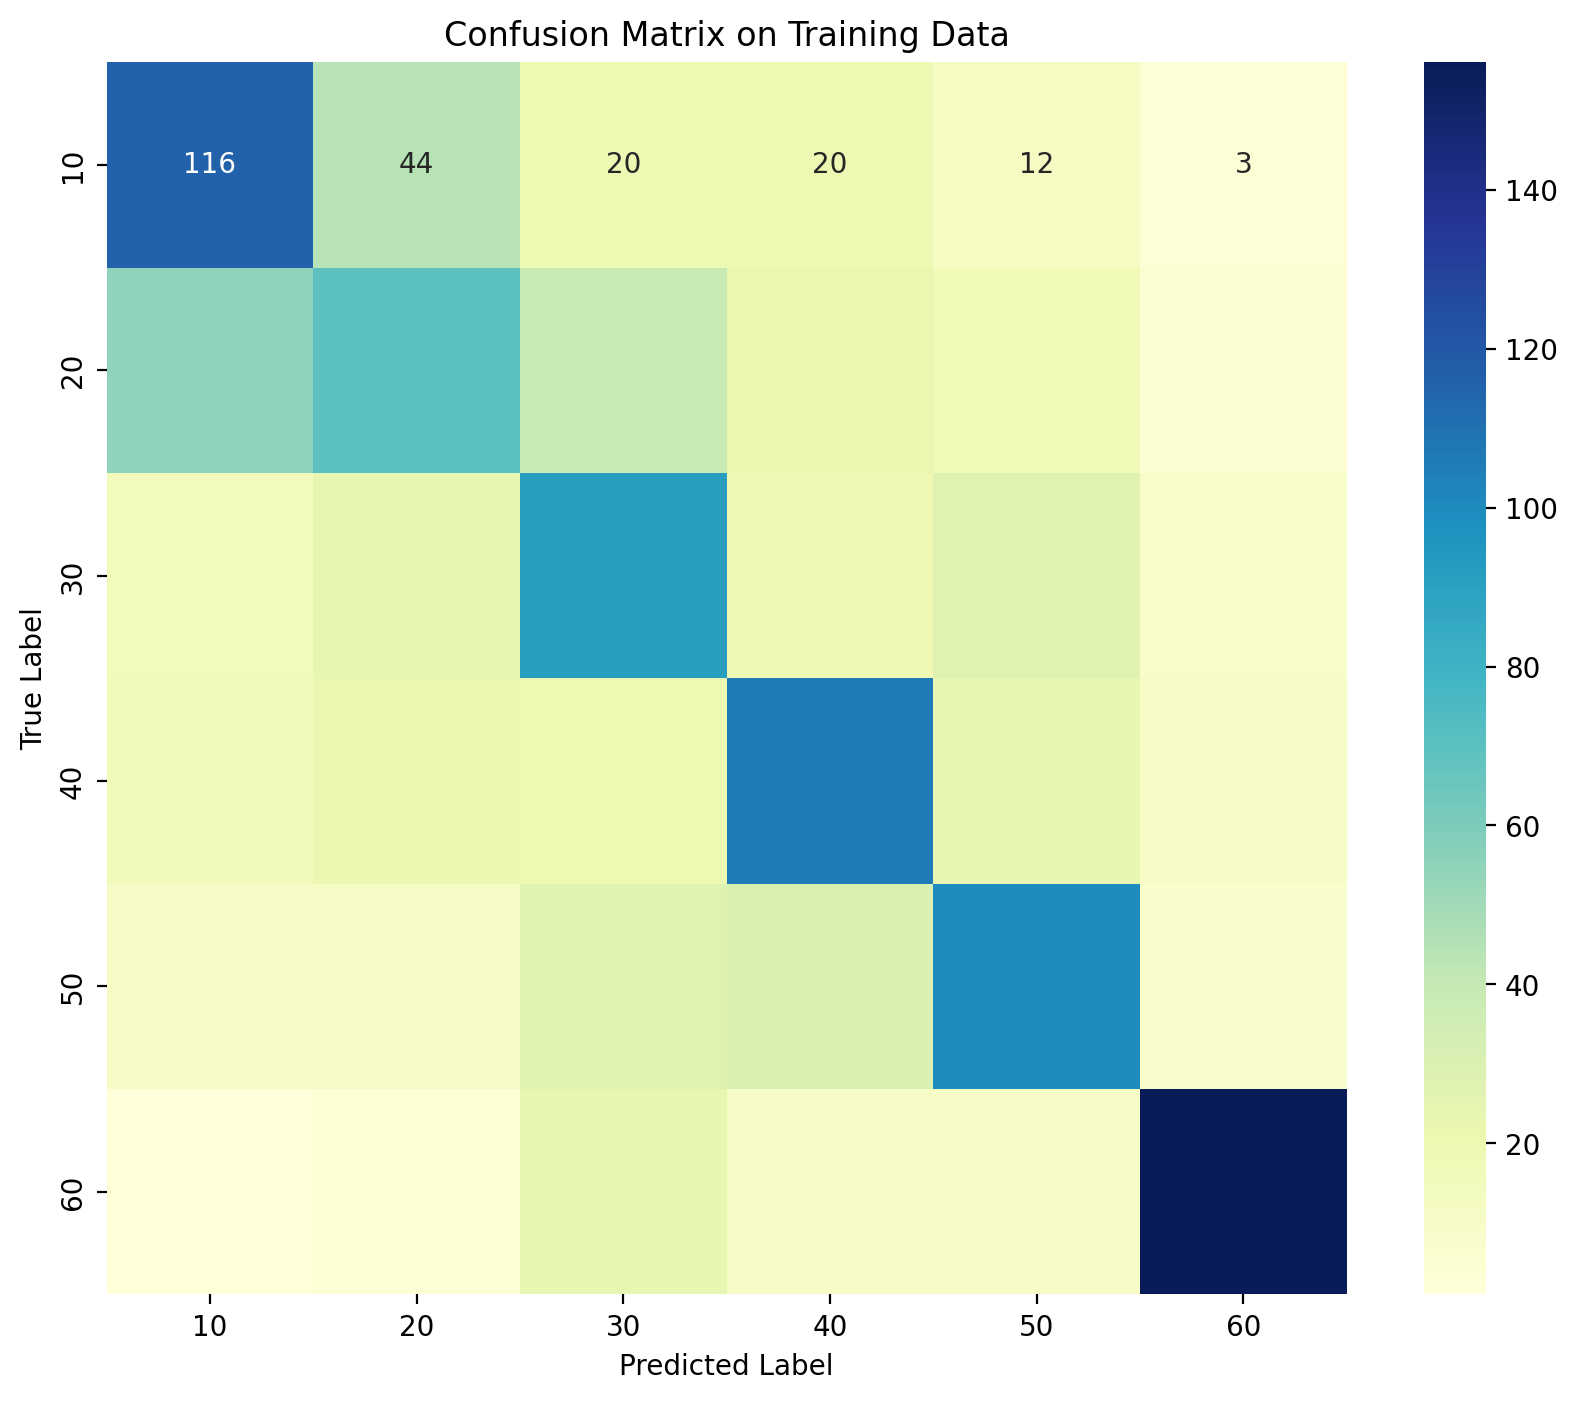

Accuracy   : 0.5325


In [99]:
train_hist_m4 = pd.DataFrame(lstm_results.history)
train_m4 = round(time.time() - t0, 3)

# Get the model predictions on the training data
# preduction
y_pred = rnn_model.predict(X_test)


# Compute the confusion matrix
#confusion_mat = confusion_matrix(y_test, y_train_pred)
# Get the model predictions on the training data
y_test_pred = rnn_model.predict(X_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test.argmax(axis=1), y_test_pred_classes)
print(confusion_mat)
(y_test.argmax(axis=1), y_test_pred_classes)
# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
df_cm = pd.DataFrame(confusion_mat, index=[10, 20, 30, 40, 50, 60], columns=[10, 20, 30, 40, 50, 60])
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix on Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Finding precision and recall
accuracy = accuracy_score(y_test.argmax(axis=1), y_test_pred_classes)
print("Accuracy   :", accuracy)

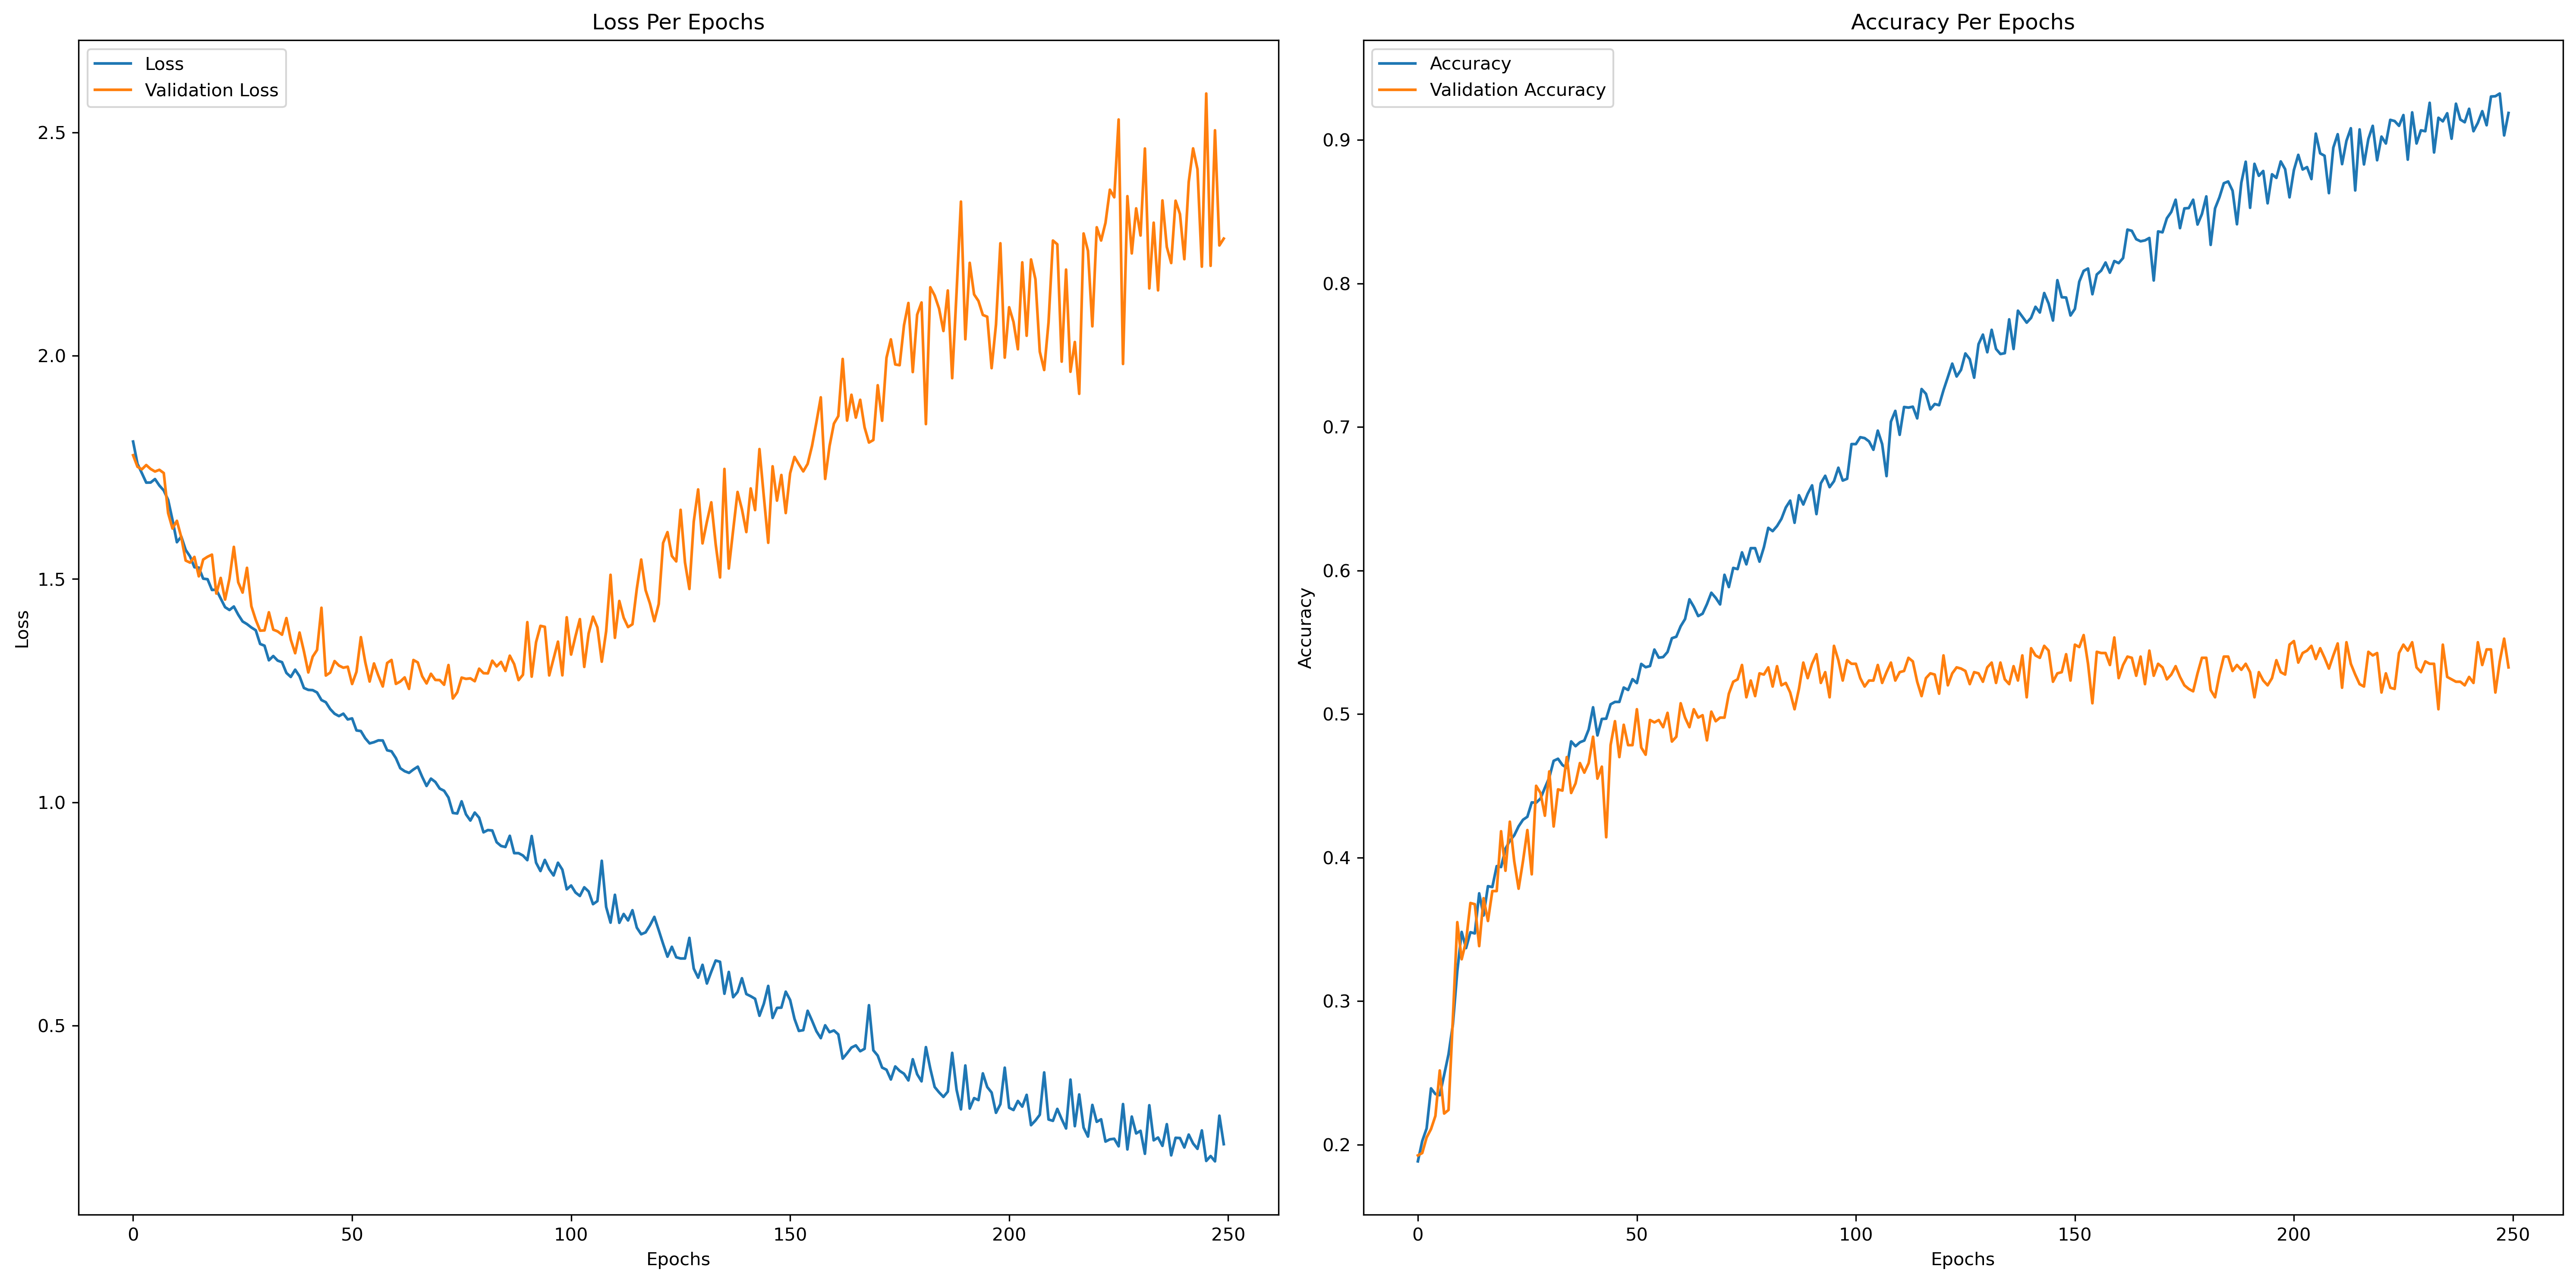

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10), dpi=300)

# Plot Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(train_hist_m4[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_hist_m4[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.tight_layout()